# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
  - In today's fast-paced world, technology has revolutionized the way people consume content, including music. While this has made it easier for users to find and enjoy music, it has also created an **overwhelming volume of songs available on platforms like Spotify**. With **limited time and attention, users need personalized recommendations to discover songs that resonate with their tastes and preferences**. As a result, companies like Spotify rely on recommendation systems to keep users engaged, increase their time spent on the platform, and drive revenue.

### **The objective:**
 - What is the intended goal?
   - The main goal of this project is to **develop a recommendation system for Spotify that can propose the top 10 songs to individual users** based on the likelihood of them listening to those songs.
  
  - The **objectives** include:
    - **Enhance User Experience**: Improve user satisfaction by offering personalized song recommendations tailored to individual preferences.
    - **Increase User Engagement**: Encourage users to spend more time on the platform by providing relevant and appealing song suggestions.
    - **Boost Retention and Revenue**: By retaining users and keeping them engaged, the platform can increase its user base and revenue.

### **The key questions:**

- What are the key questions that need to be answered?

  - **How** can we **analyze the vast preference database to understand users' music patterns**?

  - **What factors influence song preferences**, and how can we use this information for accurate recommendations?
  - How do we **design a recommendation algorithm to predict user song preferences accurately**?
  - How can we **measure the system's performance and effectiveness**?

### **The problem formulation**:
- What is it that we are trying to solve using data science?
  - Using data science and machine learning, the goal is to **build a recommendation system that predicts the top 10 songs a user is likely to enjoy**.
    
    - This involves analyzing user interactions, song features, and patterns to offer personalized suggestions, improving user engagement and addressing information overload.


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to convert non numeric / categorical variables into numerical / integer labels
from sklearn.preprocessing import LabelEncoder

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error


### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/ADSP/Million Songs Dataset/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/ADSP/Million Songs Dataset/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)


,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See the shape of the count_df dataset
count_df.shape

(2000000, 4)

In [ ]:
#  unique play_count in ascending order, to observe the distribution of play counts
np.sort(count_df['play_count'].unique())


array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [ ]:
# See top 10 records of song_df dataset
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [ ]:
# See the shape of the song_df dataset
song_df.shape

(1000000, 5)

### **Let us check the data types and and missing values of each column** in each dataset

In [ ]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# Check for missing values in count_df
count_df.isnull().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [ ]:
# See the info of the song_df data
song_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
# Check for missing values in song_df
song_df.isnull().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

### **Observations and Insights:**

####**count_df dataset:**
- There are **2,000,000 rows** and **4 columns** in the count_df dataset.
- Columns **user_id and song_id** are of data type **object**.
- Columns **play_count and Unnamed: 0** are of a **numeric data type**.
- The **Unnamed: 0 column** appears to be an **additional index column**.
  -  It contains **integer values** starting from 0 and seems to be serving as an index for the rows in the DataFrame.
  - Since it is just a **redundant index** and **doesn't contain any meaningful information**, it **can be dropped** from the count_df dataset.
    - The column "Unnamed: 0" is often created by pandas when writing a DataFrame to a CSV file without explicitly specifying the index column. When reading the data back into a DataFrame, pandas may create this extra column to represent the index values. Since it is just a default index and doesn't correspond to any meaningful information about the dataset, it is often better to drop this column to avoid redundancy and potential confusion.
- There are **no missing values** in the count_df dataset.

####**song_df dataset:**
- There are **1,000,000 rows** and **5 columns** in the song_df dataset.
- Columns **song_id, title, release** and **artist** are of **object** data type.
- Column **year** is of **numeric data type**.
- There are **missing values** in the song_df dataset.
  - The **title** column has **15 missing values**.
  - The **release** column has **5 missing values**.


### **Lets examine the summary statistics and duplicates in each dataset**:

#### **count_df dataset**:

##### **Summary Statistics**:

In [ ]:
# Check the summary statistics of the df_count dataset.
count_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,2000000.0,NaN,NaN,NaN,999999.5,577350.413527,0.0,499999.75,999999.5,1499999.25,1999999.0
user_id,2000000,76353,6d625c6557df84b60d90426c0116138b617b9449,711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song_id,2000000,10000,SOFRQTD12A81C233C0,8277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
play_count,2000000.0,NaN,NaN,NaN,3.045485,6.57972,1.0,1.0,1.0,3.0,2213.0


##### **Duplicates**:

In [ ]:
# check for duplicate rows in count_df dataset
count_df.duplicated().value_counts()

False    2000000
dtype: int64

In [ ]:
# check for unique play counts in ascending order, to observe the distribution of play counts across different values.
np.sort(count_df['play_count'].unique())

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

### **Observations and Insights:**

####**count_df dataset:**
  - **play_count**:
    - The **count** is **2,000,000**, indicating that there are **no missing values** in this column.
      - There are no null values in this column.
    - The **mean** play_count is **3.04**.
      - This suggests that **on average a song is played around 3 times**.
    - The **standard deviation** is  at approximately **6.58**.
      - This suggests that the **play_counts are spread out or vary widely from the mean**.
      - This means that **some songs have a significantly higher play count than the mean, while others have a significantly lower play count**, leading to the larger standard deviation.
        - Standard deviation represents the spread or variability in the ratings.
        - A higher standard deviation indicates wider range of ratings, while a lower standard deviation suggests that ratings are relatively close to the mean. means that
    - The **minimum play_count** of **1.0** and the **maximum play_count** of **2213** indicate the possible **range of possible values** for the play_count variable.
      - This also suggests that there are songs that have been listened to atleast once and there are songs that have been listened to more frequently.
      - This also indicates that the play_count values are a scale of 1 to 2213.

    - A significant number of ratings fall between 1.0 and 3.0
      - The quartiles provide insights into the distribution of the play_count:
        - The 25th percentile (**Q1**) is **1.0**.
        - The **median** (50th percentile or Q2) is **1.0**.
          - This indicates that **half of the songs have a play count of 1**.
        - The 75th percentile (**Q3**) is also **3.0**.
          - This indicates that a **significant portion of the play count** fall in the lower **range**, **between 1 and 3**.
          - This also implies that many songs are played relatively infrequently.

  - **user_id**:
    - There are **no missing values** in this column.
    - There are **76,353 unique users** in the dataset.
    - The **most frequent user_id** is '**6d625c6557df84b60d90426c0116138b617b9449**', which **occurs 711 times**.
      - This suggests that there are multiple occurrences of the same user_id in the data.
        - This implies that **some users have multiple interactions with different songs**, leading to <i>multiple rows for those users</i> in the dataset.
        - user_id seems to be an encrypted value.

  - **song_id**:
    - There are **no missing values** in this column.
    - There are **10,000 unique songs** in the dataset.
    - The **most frequent song_id** is '**SOFRQTD12A81C233C0**', which **occurs 8,277 times**.
      - This suggests that there are multiple occurrences of the same song_id in the data.
        - This means that the **same song has been repeated or listened to by different users**.
      - This also implies that **some songs have multiple interactions with different users**, leading to <i>multiple rows for those songs</i> in the dataset.
      - song_id seems to be an encrypted value.
  
  -**Unnamed: 0**:
    - The Unnamed: 0 column appears to be an **additional index column**, as observed earlier.
    - It **doesn't contain any meaningful information**:
      - The count is 2,000,000, indicating that there are no missing values in this column.
      - The mean is approximately 999,999.5.
      - The standard deviation is approximately 577,350.41.
      - The minimum and maximum values are 0 and 1,999,999, respectively.
        - This suggests that the values in this column are evenly distributed within the range.
      - **Unnamed: 0** column **can be dropped** from the count_df dataset.

  -**Duplicates**:
    - There are **no duplicate rows** in the count_df dataset.

#### **count_df dataset**:
##### **Summary Statistics**:

In [ ]:
# Check the summary statistics of the df_count dataset.
song_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
song_id,1000000,999056,SOUYQYY12AF72A000F,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,999985,702428,Intro,1510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release,999995,149288,Greatest Hits,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_name,1000000,72665,Michael Jackson,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1000000.0,NaN,NaN,NaN,1030.325652,998.745002,0.0,0.0,1969.0,2002.0,2011.0


##### **Duplicates**:

In [ ]:
# check for duplicate rows in song_df dataset
song_df.duplicated().value_counts()

False    999502
True        498
dtype: int64

In [ ]:
# check for years in ascending order
np.sort(song_df['year'].unique())


array([   0, 1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011])

### **Observations and Insights:**

####**song_df dataset:**
  - **song_id**:
    - There are **no missing / null values**.
      - The count of the song_id variable is **1,000,000**, which matches the **total number of observations** in the dataset.
    - There are **999056 unique song_id entries** in the dataset.
      - There are **multiple entries for the song_id** variable since the **number of unique song_id** is **less than the total count of the song_id variable**  in the dataset.
    - The **most frequent song_id** is '**SOUYQYY12AF72A000F**', which **occurs 3 times**.
      - This suggests that there are 3 occurrences of the same song_id in the data.
      -This also verifies the observation that **there are duplicate song_id entries** in the dataset, above.

  - **title**:
    - There are **missing / null values**.
      - The **count of the title variable is 999,985**, which is **less than the total number of observations** in the dataset (1,000,000). This suggests that there are some missing titles in the data.
    - There are **702428 unique title entries** in the dataset.
      - There are **multiple entries for the title** variable, since the **number of unique title names** is **less than the total count of the title variable** in the dataset.
  - The **most frequent title** is '**Intro**', which **occurs 1510 times**.
    - This suggests that **some songs share the same title**, potentially indicating **different versions or remixes of the same song**.

  - **release**:
    - There are **missing / null values**.
      - The **count of the release variable is 999,995**, which is **less than the total number of observations** in the dataset (1,000,000). This suggests that there are some missing release titles in the data.
    - There are **149288 unique release names** in the dataset.
      - There are **Multiple entries** for the release variable since the **number of unique release names** is **less than the total count of the release names** in the dataset.
    - The **most frequent release name** is '**Greatest Hits**', which **occurs 2014 times**.
      - This suggests that **several songs have been realeased under the same release name**.
        - 'Greatest Hits' albums are commonly used by artists to showcase their most successful and iconic tracks, making them attractive to both longtime fans and new listeners. As a result, multiple songs from different artists or albums may share the same release name, contributing to the high occurrence count in the dataset.
        
  - **artist_name**:
    - There are **no missing / null values**.
      - The count of the artist_name variable is **1,000,000**, which matches the **total number of observations** in the dataset.
    - There are **72665 unique artists_name**s in the dataset.
      - There are **duplicate entries** for the release variable since the **number of artist_name**s is **less than the total count of the artist_name**s in the dataset.
    - The **most frequent artist_name** is '**Michael Jackson**', which **occurs 194 times**.
      - This suggests that **some artists have multiple songs in the dataset**.

  - **year**:
    - There are **no missing / null values**.
      - The count of the year variable is **1,000,000**, which matches the **total number of observations** in the dataset.
    - The **average year** of release for songs is **1030**, which is not practically meaningful. This suggests that there might be some incorrect or missing data in the year column.
    - The **standard deviation** of the year is at approximately **998.74**,  indicating that there is **significant variation in the release years of songs** in the dataset.
    - The **minimum year** is **0**, which seems incorrect or could represent missing values or a special coding for unknown years.
    - The 25th percentile (**Q1**) is 0, indicating that 25% of the songs in the dataset have a year of 0 or earlier.
      - It is possible that these songs are from older music records, classical compositions, or from artists with missing release information in the dataset.
    - The **median** (Q2) is **1969**, meaning that half of the songs were released before 1969.
    - The 75th percentile (**Q3**) is 2002, suggesting that 75% of the songs were released before 2002.
    - The **maximum year** (max) is **2011**, indicating that there are some songs with a release year in 2011, which is the most recent year in the dataset.

  -**Duplicates**:
    - There are **duplicate rows** in the song_df dataset.

### <b>Based upon our analysis so far, lets:
- Merge the two data sets.
- Drop the duplicate values.
- Drop the 'Unnamed: 0' column</b>.


In [ ]:
# Left merge the count_df and song_df data on "song_id".
# Drop duplicates from song_df data simultaneously
merged_df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on='song_id', how='left')

# Drop the column 'Unnamed: 0'
merged_df= merged_df.drop(['Unnamed: 0'], axis = 1)

## Name the obtained dataframe as "df"
df = merged_df.copy()
df.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


In [ ]:
# check the shape of the merged dataset
df.shape

(2000000, 7)

Since the **user_id** and **song_id** are encrypted and of the object data type, we can **encode** them to **numeric features so that they can be used as input and can be processed by our recommendation system algorithim**.


In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])

df.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
5,54961,1239,5,Apuesta Por El Rock 'N' Roll,Antología Audiovisual,Héroes del Silencio,2007
6,54961,1536,1,Paper Gangsta,The Fame Monster,Lady GaGa,2008
7,54961,2056,1,Stacked Actors,There Is Nothing Left To Lose,Foo Fighters,1999
8,54961,2220,1,Sehr kosmisch,Musik von Harmonia,Harmonia,0
9,54961,3046,1,Heaven's gonna burn your eyes,Hôtel Costes 7 by Stéphane Pompougnac,Thievery Corporation feat. Emiliana Torrini,2002


In [ ]:
df.shape

(2000000, 7)

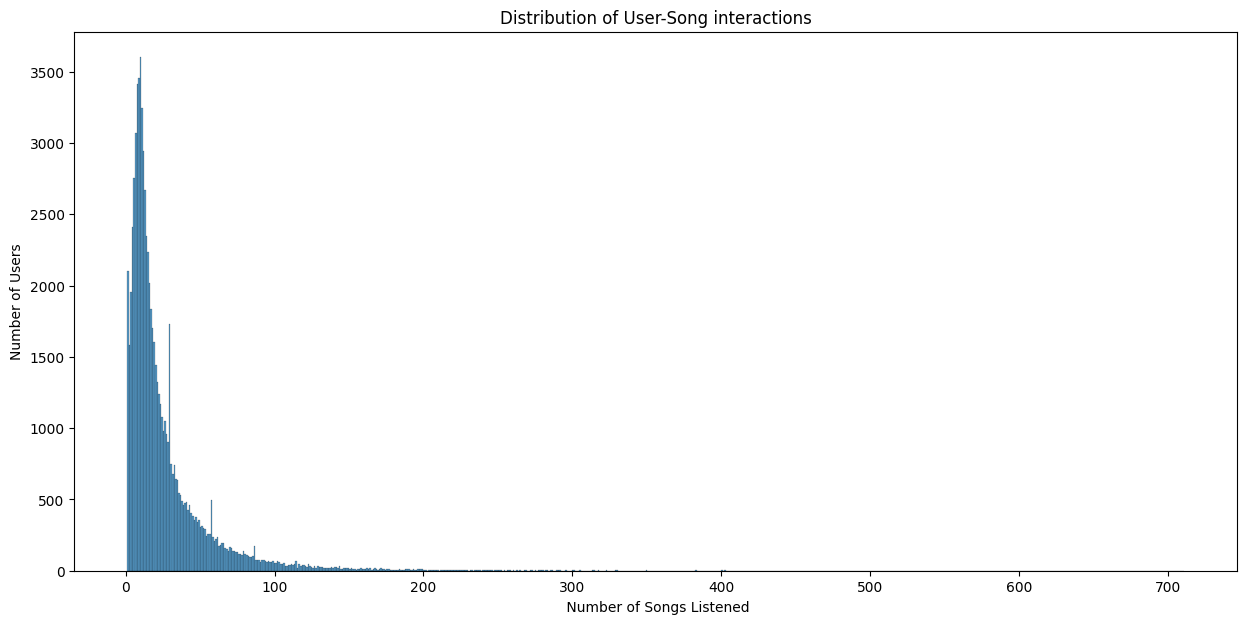

In [ ]:
# Finding user-songs interactions distribution
count_interactions = df.groupby('user_id').count()['song_id']
count_interactions
# Plotting user-item interactions distribution

plt.figure(figsize=(15,7))

sns.histplot(count_interactions)

plt.title("Distribution of User-Song interactions", fontsize = 12)

plt.xlabel(' Number of Songs Listened')

plt.ylabel('Number of Users')

plt.show()


A **dataset of size 2000000 rows x 7 columns can be quite large** and may **require a lot of computing resources** to process. This can lead to long processing times and can make it **difficult to train and evaluate** your **model** efficiently.
In order to address this issue, it may be necessary to **trim down the dataset to a more manageable size**.

- Since the data also contains **many users who have listened to very few songs and vice versa**, we will filter the data so that it contains users who have listened to a good count of songs and vice versa.

  - Here, we will be taking **users who have listened to at least 90 songs**, and the **songs that have been listened to by at least 120 users**.

- Moreover, we will **drop the songs with play_counts greater than 5**.
  - This will help remove the outliers and balance the data set and to remove any bias that may result from the songs with an overwhelmingly high play count.
  

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
df.shape

(438390, 7)

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:

    # If we already have the song, just add 1 to its rating count
    if song in ratings_count:
        ratings_count[song] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to have been listened to by atleast 120 users to be considered
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df = df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
df.shape

(130398, 7)

In [ ]:
# Drop records with play_count more than(>) 5 to remove the outliers and balance the data set and to remove any bias that may result from the songs with an overwhelmingly high play count.
df = df[df.play_count<=5]

In [ ]:
# Check the shape of the final merged and trimmed dataset
df.shape

(117876, 7)

In [ ]:
df.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
206,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
209,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
213,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
216,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


In [ ]:
# check for duplicate rows
df.duplicated().value_counts()

False    117876
dtype: int64

In [ ]:
# check the data types of the columns and for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117876 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.2+ MB


In [ ]:
# check the summary statistics of the variables in the df dataset
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,117876.0,NaN,NaN,NaN,37986.496954,22041.887894,11.0,19275.0,37049.0,57152.0,76347.0
song_id,117876.0,NaN,NaN,NaN,4896.602608,2916.276544,21.0,2220.0,5023.0,7522.0,9989.0
play_count,117876.0,NaN,NaN,NaN,1.700058,1.089517,1.0,1.0,1.0,2.0,5.0
title,117876,561,Use Somebody,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release,117876,369,Ray Guns Are Not Just The Future,1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_name,117876,232,Coldplay,5317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,117876.0,NaN,NaN,NaN,1652.819683,761.726035,0.0,1994.0,2005.0,2008.0,2010.0


In [ ]:
np.sort(df['year'].unique())

array([   0, 1969, 1970, 1971, 1973, 1974, 1975, 1976, 1978, 1979, 1980,
       1981, 1982, 1983, 1986, 1987, 1988, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010])

### **Observations and Insights:**

- The final merged and trimmed dataset **df** has:
  - **117876 rows** and **7 columns**.
  - **No duplicate rows**.
  - **No missing values**.
  - Columns **user_id, song_id, play_count** and **year** are of data type **object**.
  -Columns **title, release** and **artist_name** are of **numeric** data type.

-**Summary Statistics**:
  - **play_count**:
    - The **mean** play_count is **1.7**.
      - This means that **on average the songs in the dataset were played around 1.7 times**.
    - The **standard deviation** is at approximately **1.09**, whcih is **relatively low**..
      - This suggests that a **large proportion of songs** have **play_count valused close to the mean**.
        - Standard deviation represents the spread or variability in the ratings.
        - A higher standard deviation indicates wider range of ratings, while a lower standard deviation suggests that ratings are relatively close to the mean. means that
    - The **minimum play_count** of **1.0** and the **maximum play_count** of **5** indicate that the **range of possible play_count values is between 1 and 5**.
      - This also suggests that some songs have been listened to atleast once while others have been listened to upto five time.
  
    - A **significant number of ratings fall between 1.0 and 2.0**
      - The quartiles provide insights into the distribution of the play_count:
        - The 25th percentile (**Q1**) is **1.0**.
        - The **median** (50th percentile or Q2) is **1.0**.
          - This indicates that **half of the songs have a play count of 1**.
        - The 75th percentile (**Q3**) is also **3.0**.
          - This indicates that a **significant portion of the play count** fall in the lower **range**, **between 1 and 2**.
          - This also implies that many songs are played relatively infrequently.

  - **title**:
    - There are **561 unique song titles** in the dataset, indicating that there are **multiple entries for the same title entry**.
  - The **most frequent title** is '**Use Somebody**', which **occurs 751 times**.
    - This implies that **multiple users** may have **listened to the same song**.

  - **release**:
    - There are **369 unique release names** in the dataset.
  - The **most frequent release name** is '**Ray Guns Are Not Just The Future**', which **occurs 1843 times**.
    - This implies that **multiple songs** are **associated with the same release name, and** it has been **listened to multiple times by different users**.

  - **artist_name**:
    - There are **232 unique artist names** in the dataset.
  - The **most frequent artist name** is '**Coldplay**', which **occurs 5317 times**.
    - This implies that **multiple songs** by the **artist 'Coldplay'** in the dataset and **they have been played or interacted with a total of 5317 times**.
  
  - **year**:
    - The **average year** of release for songs is **1652.82**.
      - This suggests that the average year of song releases in the dataset is around 1652. This is not practically meaningful since there might be some incorrect or missing data in the year column.
    - The **standard deviation** of the year is at approximately **761.73**,  indicating that there is **significant variation in the release years of songs** in the dataset.
    - The **minimum year** is **0**, which seems incorrect or could represent missing values or a special coding for unknown years.
    - The 25th percentile (**Q1**) is **1994**, indicating that **25% of the songs were released before or in the year 1994**.
      - It is possible that these songs are from older music records, classical compositions, or from artists with missing release information in the dataset.
    - The **median** (Q2) is **2005**, meaning that **half of the songs were released before 2005**.
    - The 75th percentile (**Q3**) is **2008**, suggesting that **75% of the songs were released before 2008**.
    - The **maximum year** (max) is **2010**, indicating that there are some songs with a release year in 2010, which is the most recent year in the dataset.

## **Exploratory Data Analysis**

#### Let's explore **play_count**:

In [ ]:
# unique values present in the play_count
np.sort(df['play_count'].unique())

array([1, 2, 3, 4, 5])

In [ ]:
# frequency distribution of play counts
df['play_count'].value_counts()

1    72473
2    23890
3    10774
4     5874
5     4865
Name: play_count, dtype: int64

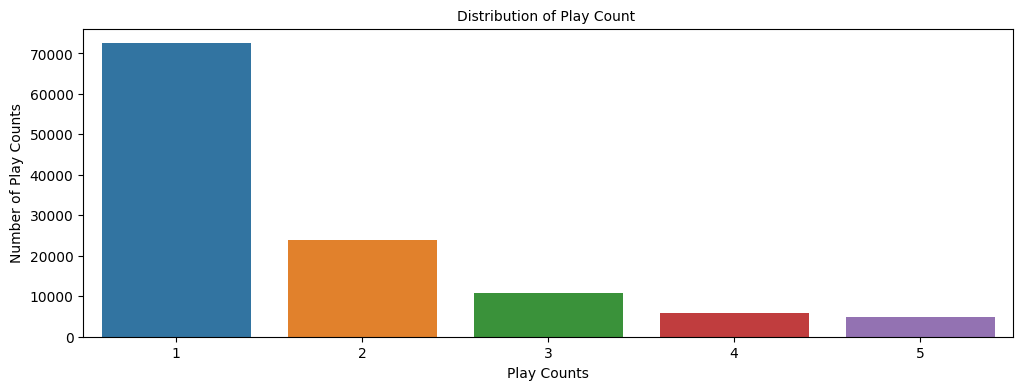

In [ ]:
# Let's visualize the distribution of play counts

plt.figure(figsize = (12, 4))
sns.countplot(x="play_count", data=df)

plt.tick_params(labelsize = 10)
plt.title("Distribution of Play Count ", fontsize = 10)
plt.xlabel("Play Counts", fontsize = 10)
plt.ylabel("Number of Play Counts", fontsize = 10)

plt.show()

#### **top 10 artists with most songs**:

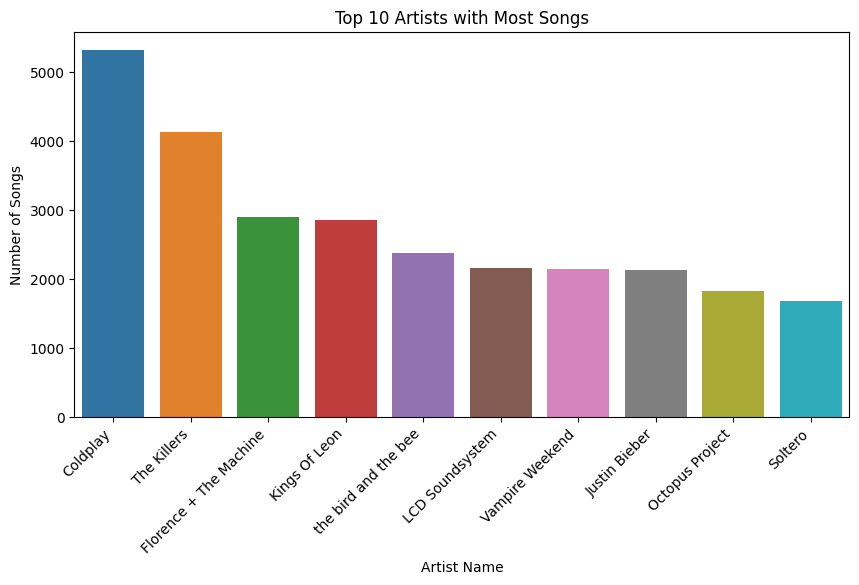

In [ ]:
# Visualizing the top 10 artists with most songs

top_artists = df['artist_name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.title('Top 10 Artists with Most Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

#### **Songs played in a year**:

In [ ]:
# Find out the number of songs played in a year
count_songs = df.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


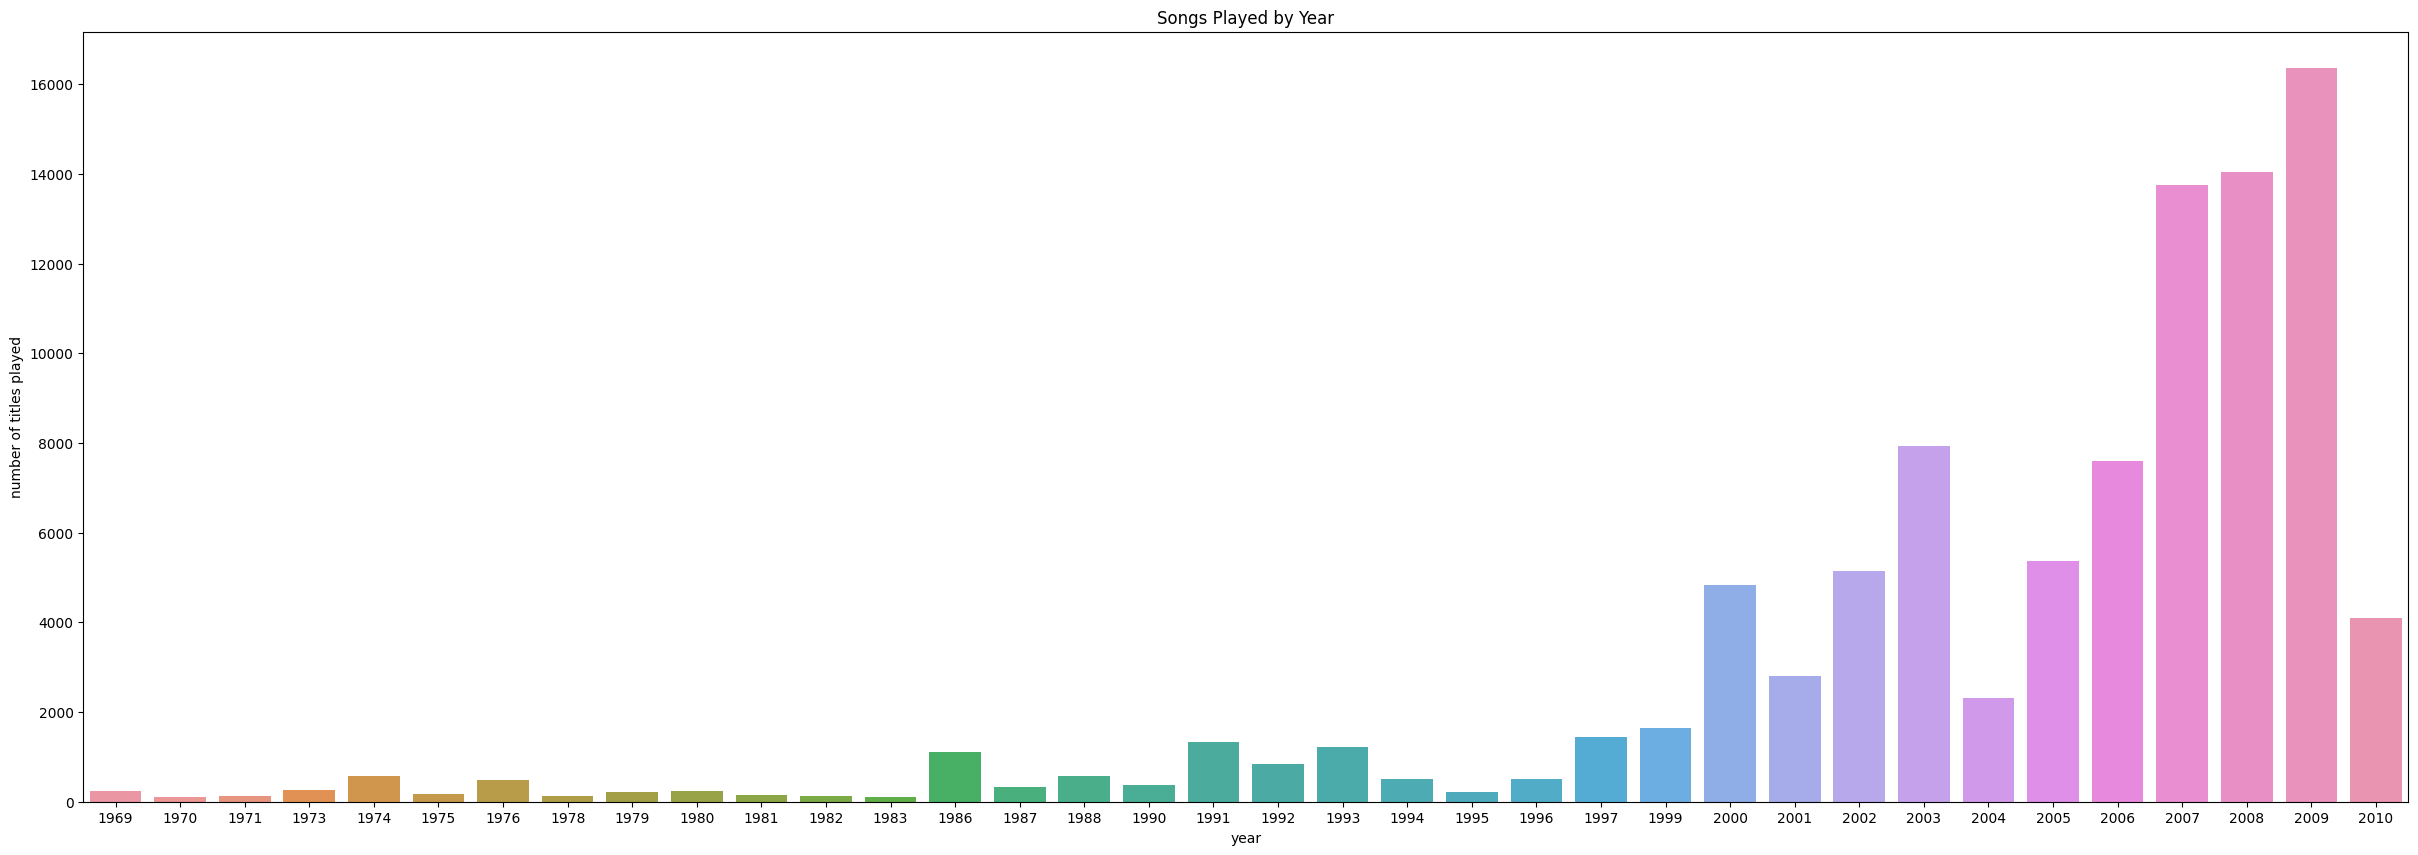

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played')
plt.title('Songs Played by Year')

# Show the plot
plt.show()

### **Observations and Insights:**

- The dataset contains music data spanning several years, from the earliest recorded year 0 to the most recent year 2010.

- In the **early years**, such as 0, 1969, 1970, and 1971, the **number of songs played is relatively low**. This could be due to limited music availability during those times or potential missing data.

- There is an **increase in the number of songs played starting from the late 1970s (1973) and continuing through the 1980s and 1990s**. This trend indicates a growing interest in music consumption during these decades:

  - The late 1970s, 1980s, and 1990s witnessed the rise of various music genres like rock, pop, hip-hop, and electronic dance music. The popularity of these genres contributed to a surge in music consumption as people embraced new styles of music.

- The years 1986, 1991, 1993, and 2000 stand out with notably high counts of songs played, suggesting that these were significant years for music consumption:
  - **1986**: This year saw the release of many iconic albums and singles from various genres, which contributed to a spike in music consumption.

  - **1991**: The early 1990s marked the rise of grunge and alternative rock, with bands like Nirvana and Pearl Jam gaining immense popularity. This led to a surge in music consumption, especially among the younger generation.

  - **1993**: The mid-1990s witnessed the emergence of hip-hop as a dominant genre, with influential albums released during this time. This contributed to increased music consumption within the hip-hop community and beyond.

  - **2000**: The turn of the millennium brought heightened excitement and interest in music, leading to increased consumption and celebration of music from various genres.

- The **most significant growth** in the number of songs played occurs between the years **2002 and 2009**, particularly with a sharp increase from **2005 to 2009**. This period corresponds to the **rapid expansion of online music streaming services and the increasing popularity of digital music consumption**.

- The year 2009 has the highest count of songs played, indicating a peak in music consumption during that year.

- There is a slight dip in the number of songs played in the year 2010, which could be due to data collection limitations or other external factors.

- In the most recent years, such as **2009 and 2010**, the **number of songs played starts to decrease**. This could be **due to potential data limitations** or a shift in music consumption behavior.

####**User-Songs Interactions:**

In [ ]:
# count of how many times each user listened to each song
df.groupby(['user_id', 'song_id']).count()

play_count  title  release  artist_name  year
user_id song_id                                               
11      5158              1      1        1            1     1
        8019              1      1        1            1     1
        8882              1      1        1            1     1
17      314               1      1        1            1     1
        703               1      1        1            1     1
...                     ...    ...      ...          ...   ...
76342   5375              1      1        1            1     1
        7889              1      1        1            1     1
        8494              1      1        1            1     1
        9942              1      1        1            1     1
76347   5879              1      1        1            1     1

[117876 rows x 5 columns]

In [ ]:
# calculate the total number of user-song interactions in the DataFrame df. Sum up the 'play_count' column for all the interactions.
df.groupby(['user_id', 'song_id']).count()['play_count'].sum()

117876

In [ ]:
# Lets look at the interaction density of the user-song interaction.

total_interactions = len(df)
unique_users = df['user_id'].nunique()
unique_items = df['song_id'].nunique()

interaction_density = total_interactions / (unique_users * unique_items)
print("Interaction Density:", interaction_density)

Interaction Density: 0.06636171967583666


### **Observations and Insights:**
- The sum of the total number of user-song interactions is equal to the total number of observations, which implies that there is **only one interaction between a song and a user**.
- The interaction density of the user-song interaction matrix is very low (0.066)

####**Distribution of the user-songs interactions in the dataset**

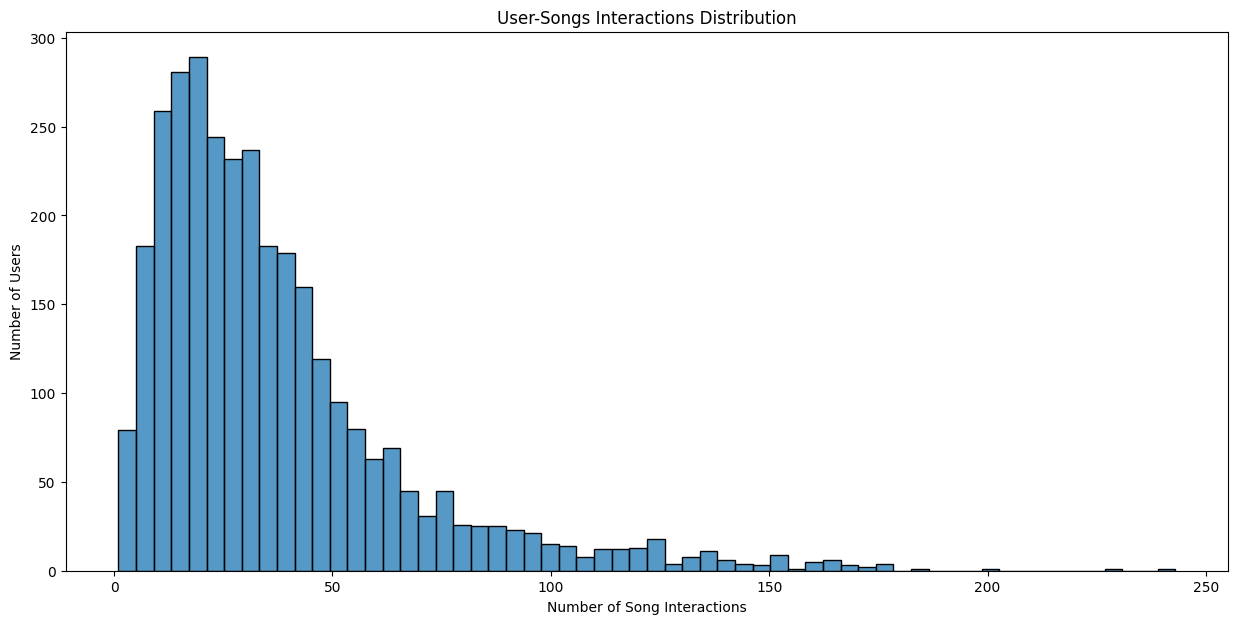

In [ ]:
# Finding user-songs interactions distribution
count_interactions = df.groupby('user_id').count()['song_id']
count_interactions
# Plotting user-item interactions distribution

plt.figure(figsize=(15,7))

sns.histplot(count_interactions)

plt.title('User-Songs Interactions Distribution', fontsize = 12)
plt.xlabel('Number of Song Interactions',fontsize = 10)
plt.ylabel('Number of Users')

plt.show()

### **Observations and Insights:**
It clearly shows that there are very few songs which have many ratings

- The majority of users have a relatively low number of song interactions, with some users having many interactions.
- There are a few users with a significantly higher number of song interactions, which results in a long tail distribution.
- The peak of the distribution is likely around 20-40 interactions, as there are several users in this range.
- As the number of interactions increases, the count of users with such high interactions decreases, indicating that very active users are relatively rare in the dataset.
- The distribution is **right-skewed**, suggesting that **a small number of users contribute to a large proportion of song interactions**.

### **Let's check the total number of unique users, songs, artists in the data**

In [ ]:
df.shape

(117876, 7)

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df['user_id'].nunique()


3155

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df['song_id'].nunique()


563

Total number of unique artists

In [ ]:
# Display total number of unique artists
df['artist_name'].nunique()

232

In [ ]:
#  most frequent artist
most_frequent_artist = df['artist_name'].value_counts().idxmax()
artist_count = df['artist_name'].value_counts().max()
print(f"The most frequent release is '{most_frequent_artist}' with {artist_count} appearances.")


The most frequent release is 'Coldplay' with 5317 appearances.


Total number of unique releases

In [ ]:
# Display total number of unique title
df['release'].nunique()

369

In [ ]:
#  most frequent release
most_frequent_release = df['release'].value_counts().idxmax()
release_count = df['release'].value_counts().max()
print(f"The most frequent release is '{most_frequent_release}' with {artist_count} appearances.")

The most frequent release is 'Ray Guns Are Not Just The Future' with 5317 appearances.


### **Observations and Insights:**

- There are **117876 rows** and **7 columns** in the df dataset.
  - This dataset focuses on users who have listened to a minimum of 90 songs and songs that have been played by at least 120 different users, while ensuring that each song has been played a maximum of 5 times.
- There are **3155 unique users**.
  - Each of these users have heard at least 90 songs.
- There are **563 unique songs**.
  - Each of these songs have been played by atleast 120 different users upto 5 times.
- There are **232 unique artists**.

- Not every user has heard every song in this dataset.
  - There is a **possibility of 3155 * 563 = 1,776,485 user-song interactions** in the data set. But **we only have 117876 user-song interactions** i.e. not every user has heard every song in this dataset.

So we can build a recommendation system to recommend songs to users which they have not interacted with as yet.

### **Let's find out about the most interacted songs and interacted users**

####**Most interacted songs:**

- The "most interacted songs" typically refers to the **songs with the highest number of occurrences of each unique user-song combination**.
- It means that the song is being played by a large number of users.

  - While the most played song (i.e., the song with the highest sum of play_counts) can also be considered as an important metric, it may not necessarily reflect the overall popularity and engagement of a song across different users. A song with a high number of plays from a single user might have a high play_count but may not be as popular across the entire user base.

In [ ]:
# Top 10 songs (most played /interacted songs) in the dataset
df['song_id'].value_counts()[:10]


8582    751
352     748
2220    713
1118    662
4152    652
5531    618
4448    609
6189    606
6293    583
1334    570
Name: song_id, dtype: int64

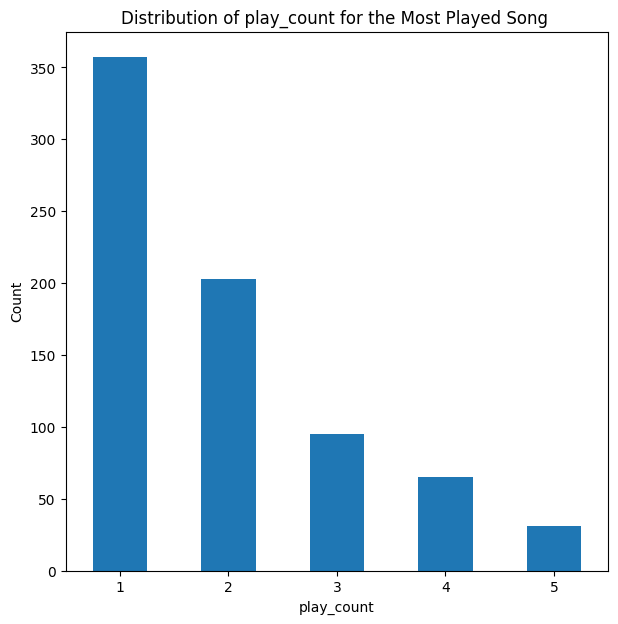

In [ ]:
# Plotting distributions of play_count for the most interacted song

plt.figure(figsize=(7,7))

df[df['song_id'] == 8582]['play_count'].value_counts().plot(kind='bar')

plt.title("Distribution of play_count for the Most Played Song ", fontsize = 12)
plt.xlabel('play_count', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

plt.xticks(rotation=0)

plt.show()

####**Most interacted users:**

 - A most interacted user is someone who has listened to the most number of <i>(different)</i> songs.

In [ ]:
# Top 10 users (users who listened to / interacted with the most (different) songs) in the dataset
df['user_id'].value_counts()[:10]

61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
26616    175
9097     175
43041    174
65994    171
Name: user_id, dtype: int64

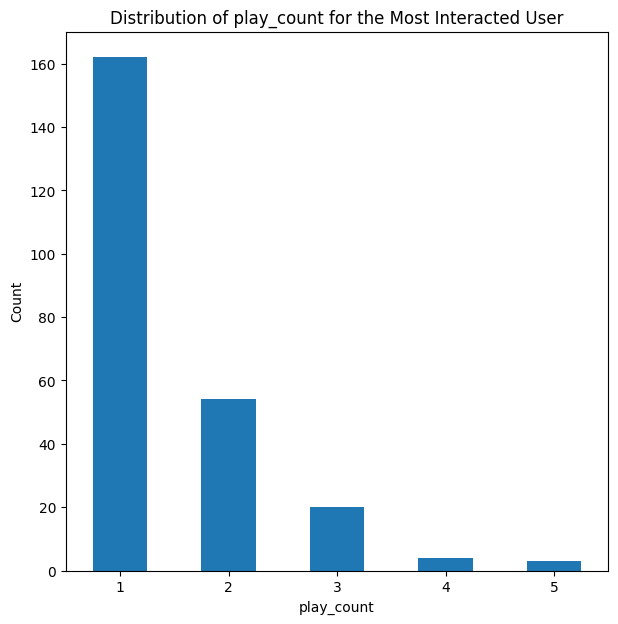

In [ ]:
# Plotting distributions of play_count for the most interacted user

plt.figure(figsize=(7,7))

df[df['user_id'] == 61472]['play_count'].value_counts().plot(kind='bar')

plt.title("Distribution of play_count for the Most Interacted User", fontsize = 12)
plt.xlabel('play_count', fontsize = 10)
plt.ylabel('Count', fontsize = 10)

plt.xticks(rotation=0)

plt.show()


### **Observations and Insights:**

- The song with **song_id = 8582** is the **most played** or interacted song, with **751 interactions** in the dataset, which is far from the actual number of users (3155) present in the data.
  - The **majority** of users have **listened** to this song **only once**.
  - The play_count distribution of this song is **right skewed**, which indicates that most users listen to the song only a few times, while a smaller number of users might listen to it more frequently.  

- The user with **user_id = 61472** is **most interacted use** and has **played 243 songs**, which is far from the actual number of songs (563) present in the data.
  - This user has **listened to a most songs only once**.
  - The number of songs listened to decreases as the play count increases, indicating that this **user has a diverse taste in songs and explores a wide range of music**.

- The fact that **song_id = 8582** has had **751 interactions** while there are 3155 unique users and the fact that **user_id = 61472**  has interacted with 243 songs while there are 563 unique songs present  in the dataset, indicates the possibility of many more user-song interactions. We can build a recommendation system to recommend songs to users which they have not interacted with.

- **song_id = 8582** has **751 interactions** while there are **3155 unique users**. Similarly, **user_id = 61472** has **interacted with 243 songs**, although there are **563 unique songs** in the dataset. These observations hint at the **potential for numerous untapped user-song interactions**.

To capitalize on this untapped potential and enhance the user experience, a recommendation system can be developed.


#**Important Insights from EDA**:

- The **final dataset** has a total of **117,876 rows and 7 columns**.
  - There are **no duplicate rows**.
  - There are **no missing values**.
  - The columns 'user_id', 'song_id', 'play_count', and 'year' are of data type object.
  - The columns 'title', 'release', and 'artist_name' are of numeric data type.

- For the **'play_count'** variable:
  - The **mean** play_count is **1.7**
  - The **standard deviation** is approximately **~1.09**, which is relatively low, suggesting that a large proportion of songs have play_count values close to the mean.
  .- The **minimum** play_count is **1.0**, and the **maximum** is **5.0**, indicating that songs have been listened to at least once and up to five times.
  - A **significant number** of play_count fall **between 1.0 and 2.0**.
  - The **median (50th percentile) play_count is 1.0, implying that many songs are played relatively infrequently**.

- There are **3155 unique users**
- There are **563 unique songs**.
- There are **232 unique artists**.
  - The artist **'Coldplay'** is the most frequent, occurring **5,317 times**.

- Not every user has heard every song in this dataset.
  - There is a **possibility of 3155 * 563 = 1,776,485 user-song interactions** in the data set. But **we only have 117876 user-song interactions** i.e. not every user has heard every song in this dataset.


So we can build a recommendation system to recommend songs to users which they have not interacted with as yet.
- Most significant growth in the number of songs played occurs between the **years 2002 and 2009**, particularly with a sharp increase from 2005 to 2009.
  - This **period** corresponds to the **rapid expansion of online music streaming services and the increasing popularity of digital music consumption**.

- The **distribution of user-song interactions is right-skewed**, with a small number of users contributing to a large proportion of song interactions.

- The **most** played or **interacted song has 751 interactions**, while the **most** interacted **user has played 243 songs**. This indicates that there is the **potential for many more user-song interactions**, suggesting the need for a recommendation system to recommend songs to users they have not interacted with.

- The interaction density of the user-song interaction matrix is very low (0.066)

Overall, **the presence of untapped user-song interactions opens opportunities to develop a recommendation system to enhance user engagement and music discovery.**



###**Now that we have explored the data, let's apply different algorithms to build recommendation systems.**


## **Building Various Models**

## **Model 1: Popularity-Based Recommendation Systems**

- Popularity-based recommendation is a simple and intuitive approach to making recommendations to users.
  - It involves suggesting items to users based on their overall popularity or the number of times they have been interacted with by other users.
- In the context of a music recommendation system, a popularity-based recommendation would involve **suggesting the most popular songs to users**.

**Advantages**:

- **Simplicity**: Popularity-based recommendations are easy to implement and understand. They don't require complex algorithms or user-specific data.
- **No Cold Start Problem**: Popularity-based recommendations work well when there's little or no information about the user's preferences (cold start problem), as they recommend popular items to all users.
- **Applicability**: This approach is particularly useful when starting a new recommendation system without historical user interactions.

**Disadvantages**:

- **Lack of Personalization**: Recommendations are not tailored to individual users' preferences. **All users receive the same recommendations regardless of their tastes**.
- **Limited Diversity**: Over time, this approach may result in a "rich get richer" scenario where popular items become even more popular, leading to a lack of diversity in recommendations.
**Ignoring User Preferences**: Popularity-based recommendations ignore the unique preferences and interests of individual users.

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
df.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
206,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
209,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
213,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
216,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


In [ ]:
# Calculating average play_count for each song

average_play_count = df.groupby('song_id').mean()['play_count']  # Use groupby function on the song_id column, then select the play_count column from the grouped data and apply the mean() function

# Calculating the frequency a song is played (count of playcounts)
play_freq = df.groupby('song_id').count()['play_count'] # group the dataset by song_id, then count occurences of play_count for each unique song_id.


In [ ]:
# Making a dataframe with the average_count and play_freq
final_play_count = pd.DataFrame({'avg_play_count':average_play_count, 'play_freq':play_freq})

# Sort the dataframe by average of play_count ratings in the descending order

final_play_count = final_play_count.sort_values('avg_play_count', ascending =False)

# Let us see the first five records of the final_play dataset
final_play_count.head()


,avg_play_count,play_freq
song_id,,
7224,3.373832,107
8324,2.625000,96
6450,2.578431,102
9942,2.486667,150
5531,2.309061,618


Now, let's create a **function to find the top n songs for a recommendation based on the average play count of song**. We can also add a **threshold for a minimum number of playcounts** for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs based on the highest average play count and minimum interactions (min number of playcounts)

def top_n_songs(data, n, min_interactions):
  # Finding songs with minimum number of interactions
  recommendations = data[data['play_freq']>min_interactions]

  # Sorting values with respect to average play count
  recommendations = recommendations.sort_values(by='avg_play_count', ascending = False)

  return recommendations.index[:n]

In [ ]:
# to find the minimum and maximum number of times a song is played by users (to help decide on threshold for min_interactions later)

play_count_counts = df.groupby('song_id')['play_count'].count()
min_count = play_count_counts.min()
max_count = play_count_counts.max()

print("Minimum number of times a song is played by users:", min_count)
print("Maximum number of times a song is played by users:", max_count)

Minimum number of times a song is played by users: 96
Maximum number of times a song is played by users: 751


#### **Recommending top 10 songs with 200 minimum interactions based on popularity**

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(data = final_play_count, n =10, min_interactions = 200)) #  recommend top 10 songs (n=10) with at least 200 interactions (min_interactions = 200) based on popularity

[5531, 2220, 614, 352, 1664, 6246, 4448, 1334, 8019, 7496]

#### **Recommending top 10 songs with 400 minimum interactions based on popularity**

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(data = final_play_count, n =10, min_interactions = 400)) #  recommend top 10 songs (n=10) with at least 400 interactions (min_interactions = 400) based on popularity

[5531, 2220, 352, 6246, 4448, 1334, 8092, 317, 4284, 8138]

We have recommended the **top 10 songs** by using the **popularity based recommendation system**.

##**To build the user-user-similarity-based and subsequent models we will use the "surprise" library**.


In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering


**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

##**We will be looking at the values for precision@k, recall@k, RMSE, and F1_Score@k to compare the performance of different models**.

### **Some useful functions**

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

####**Threshold:**

In the function precision_recall_at_k, the **threshold value of 1.5** is used to define the relevance of predicted items for a user. The **intuition behind using this threshold value is to consider items with a predicted score greater than or equal to 1.5 as relevant or recommended to the user**.

Changing the **threshold** value can **significantly impact precision and recall**. Here's how:

**Precision**:

- If the **threshold is increased** (e.g., from 1.5 to 2.0), **fewer items will be considered relevant**. This will likely decrease the number of true positives (correctly recommended items) while reducing the number of false positives (incorrectly recommended items). As a result, **precision may increase** because the ratio of true positives to all predicted positives improves.

- On the other hand, if the **threshold is decreased** (e.g., from 1.5 to 1.0), **more items will be considered relevant**. This may increase the number of true positives but also lead to more false positives, as the model is making more recommendations. As a result, **precision may decrease** because the ratio of true positives to all predicted positives worsens.

**Recall**:

- If the **threshold is increased**, **fewer items will be considered relevant**, leading to a decrease in the number of true positives. However, this may also lead to a decrease in the number of false negatives (relevant items that were not recommended). As a result, **recall may increase** because the ratio of true positives to all actual positives improves.

- If the **threshold is decreased**, **more items will be considered relevant**, leading to an increase in the number of true positives. However, this may also increase the number of false negatives, as some relevant items may not be recommended. As a result, **recall may decrease** because the ratio of true positives to all actual positives worsens.

The choice of the threshold depends on the specific use case and the trade-off between precision and recall that is desired. **A higher threshold can result in higher precision but lower recall**, meaning the recommendations are more accurate but **may miss some relevant items**. A **lower threshold can result in higher recall but lower precision**, meaning more relevant items are recommended, but there may be **more irrelevant items in the recommendations**.

The **threshold value of 1.5** used in the function is **arbitrary** and is determined based on the specific characteristics of the data, the recommendation algorithm, and the preferences of the users. It has been **chosen as a balance between precision and recall based on experimentation and evaluation of the recommendation system's performance** on a validation or test dataset.

- <i>Here are the evaluation metrics for different threshold values with a test size of 0.4:
  - **Threshold = 1.5**:
  RMSE: 1.0878;
  Precision:  0.396;
  Recall:  0.692;
  F_1 score:  0.504
  
  - **Threshold = 2.0**:
  RMSE: 1.0878;
  Precision:  0.291;
  Recall:  0.126;
  F_1 score:  0.176
  
  - **Threshold = 2.5**:
  RMSE: 1.0878;
  Precision:  0.029;
  Recall:  0.009;
  F_1 score:  0.014

 For brevity, the specific code used for calculating evaluation metrics at each threshold value for a test size of 0.4 is commented out below.
  -  The values of the metrics are obtained by inputting different threshold values in the function (evaluate_recommendation_system).







In [ ]:
# calculating evaluation metrics at different threshold and test size values

# def precision_recall_at_k(model, k=30, threshold=1.0):
#     """Return precision and recall at k metrics for each user"""

#     # First map the predictions to each user.
#     user_est_true = defaultdict(list)

#     # Making predictions on the test data
#     predictions = model.test(testset)

#     for uid, _, true_r, est, _ in predictions:
#         user_est_true[uid].append((est, true_r))

#     precisions = dict()
#     recalls = dict()
#     for uid, user_ratings in user_est_true.items():

#         # Sort user ratings by estimated value
#         user_ratings.sort(key=lambda x: x[0], reverse=True)

#         # Number of relevant items
#         n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

#         # Number of recommended items in top k
#         n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

#         # Number of relevant and recommended items in top k
#         n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
#                               for (est, true_r) in user_ratings[:k])

#         # Precision@K: Proportion of recommended items that are relevant
#         # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0
#         precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

#         # Recall@K: Proportion of relevant items that are recommended
#         # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0
#         recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

#     # Mean of all the predicted precisions are calculated
#     precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

#     # Mean of all the predicted recalls are calculated
#     recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

#     accuracy.rmse(predictions)

#     # Command to print the overall precision
#     print('Precision:', precision)

#     # Command to print the overall recall
#     print('Recall:', recall)

#     # Formula to compute the F-1 score
#     print('F_1 score:', round((2 * precision * recall) / (precision + recall), 3))
#     print("\n")

# def evaluate_recommendation_system(test_size_values, threshold_values):
#     for test_size in test_size_values:
#         # Instantiating Reader scale with expected rating scale
#         reader = Reader(rating_scale=(0, 5))
#         # Loading the dataset
#         data = Dataset.load_from_df(df[['user_id', 'song_id', 'play_count']], reader)
#         # Splitting the data into train and test dataset
#         trainset, testset = train_test_split(data, test_size=test_size, random_state=42)

#         # Build the default user-user-similarity model
#         sim_options = {'name': 'cosine', 'user_based': True}
#         sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)
#         sim_user_user.fit(trainset)

#         for threshold in threshold_values:
#             # Evaluate the recommendation system with the specified threshold value
#             print(f"Test size: {test_size}, Threshold: {threshold}")
#             precision_recall_at_k(sim_user_user, k=30, threshold=threshold)

# # Example usage
# test_size_values = [0.2, 0.3, 0.4]
# threshold_values = [1.0, 1.5, 2.0]
# evaluate_recommendation_system(test_size_values, threshold_values)

####**Preparing the data**:
Below we are preparing the data for building and evaluating a recommendation system. It sets up the data in a format suitable for the Surprise library, and then it splits the data into training and testing sets to assess the performance of the recommendation model on unseen data.

In [ ]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale = (0,5)) # create an instance of the 'Reader' class with the rating scale (0,5) i.e. play_counts can take a value between 0 and 5

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df[['user_id', 'song_id', 'play_count']], reader) # load the data from DataFrame df and create a Dataset object using the load_from_df() with 2 arguments (df, reader)


# Splitting the data into train and test dataset
# Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42) # split the dataset and use 40% of the data for testing, and the remaining 60% for training.

**Changing the test size in the train-test split** can have several effects on the results and outputs of a machine learning model:

- **Higher Test Size**:
  - If you increase the test size, i.e., use a larger proportion of the data for testing, it means that you have **less data available for training** the model. This can lead to a **decrease in the model's performance** on the test set as it might **not** have **enough data to learn the underlying patterns and generalize** well to unseen data.
  - A larger test size might help you get a **better** estimate of how well the model will perform on unseen data (**generalization**)
  -Larger test sizes can **increase the computational cost** of evaluating the model, as predictions need to be made for more data points.

- **Lower Test Size**:
  - Conversely, if you decrease the test size and use a smaller proportion of the data for testing, you will have **more data available for training**. In this case, the **model might perform bette**r on the test set as it has **more data to learn from** and may have a **better understanding of the underlying patterns** in the training data.
  - A smaller test size might increase the **risk of overfitting**, where the model performs well on the test set but poorly on new, unseen data.
  - With a smaller test size, the model's performance might be sensitive to the particular data points in the test set, leading to more variability in performance scores.

Ultimately, the choice of the test size depends on the specific goals of the model evaluation, the size of the dataset, and the computational resources available. It's **essential to strike a balance between having enough data for training and evaluation while ensuring a reliable estimate of the model's performance on unseen data**. A common practice is to use a test size between 20% to 30% when the dataset is reasonably large, but this can vary depending on the context and data availability.

- <i>Here are the evaluation metrics for different test sizes with a threshold value of 1.5:
  - **Test size = 0.2**:
  RMSE: 1.0101;
  Precision: 0.457;
  Recall: 0.724;
  F_1 score: 0.56;

  - **Test size = 0.3**:
  RMSE: 1.0525;
  Precision: 0.417;
  Recall: 0.696;
  F_1 score: 0.522
  
  - **Test size = 0.4**:
  RMSE: 1.0878;
  Precision: 0.396;
  Recall: 0.692;
  F_1 score: 0.504

 For brevity, the specific code used for calculating evaluation metrics at each test size value for a threshold of 1.5 is commented out above in this notebook.  
  -  The values of the metrics are obtained by inputting different test size values in the function (evaluate_recommendation_system) commented out above.









#### We are now prepared to embark on building various recommendation systems.

## **Collaborative Filtering Recommendation System**

- Collaborative filtering methods **leverage user-item interaction data to make recommendations**.
   - **User-User**: Recommends items based on the preferences of similar users.
   - **Item-Item**: Recommends items similar to those the user has already interacted with.
- Collaborative filtering is **powerful in capturing complex user-item relationships** and is often effective when personalized recommendations are important.

- In both User-User Collaborative Filtering and Item-Item Collaborative Filtering, **recommendations are made to a target user based on the preferences and behaviors of either similar users (User-User) or similar items (Item-Item)**.

- **Both approaches rely on the idea that users who had similar preferences in the past will continue to have similar preferences in the future**. They leverage the wisdom of the crowd to provide recommendations. These approaches do not require explicit knowledge about items or users; they only need interaction data to calculate similarities.


- **Advantages**:
  - **Personalization**: CF offers personalized recommendations based on users' past behaviors, enhancing user engagement by suggesting items aligned with their preferences.
  - **Serendipity and Exploration**: CF introduces users to novel and diverse items, encouraging exploration beyond their usual choices, leading to more enjoyable and exciting user experiences.
  - **Adaptability to User Changes**: CF adjusts recommendations in real-time as user preferences evolve, ensuring that the suggestions remain relevant and up-to-date.
  - **Effective for Long-Tail Recommendations**: CF is particularly adept at recommending niche or less popular items, making it ideal for businesses aiming to promote a wide range of products.

- **Disadvantages**:
  - **Cold Start Problem**:
    - **Cold Start for Users**: When a new user joins, there is no or minimal historical data to find similar users or preferences.
    - **Cold Start for Items**: When a new item is added, there might not be enough interactions to calculate its similarity with other items
  - **Scalability issues**: Computing user or item similarities becomes computationally expensive as the dataset grows.
  - **Diversity**: Recommendations might lack diversity due to the tendency to recommend popular items.
- Addressing these challenges is essential to ensure the reliability and quality of recommendations.

## **Model 2: User User Similarity-Based Collaborative Filtering Recommendation System**

Here's how this approach generally works:
- **User-User Collaborative Filtering**:

  - **User Similarity Calculation**: For a target user, the system identifies other users who have shown similar preferences in terms of items they have interacted with (e.g., rated, purchased, listened to).
  - **Neighborhood Selection**: A subset of users with the highest similarity to the target user is selected. This subset is often referred to as the "neighborhood."
  - **Aggregation of Preferences**: The system aggregates the preferences of the target user's neighborhood to make recommendations. This can involve combining ratings, play counts, or other interaction data.
  - **Recommendation Generation**: Items that the target user's neighborhood members have interacted with, but the target user has not, are recommended to the target user.

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  

- We are  now **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

In [ ]:
# Build the default user-user-similarity model

sim_options = {'name' : 'cosine',
               'user_based': True}


# use KNN algorithm to find desired similar items based upon the sim_options declared above and setting random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) # institiate the KNNBasic algorithm and create the sim_user_user object, to find similar users among a set of given users

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30 (since we are recommending top 10 songs), using the precision_recall_at_k function defined above
precision_recall_at_k(sim_user_user)


NameError: ignored

### **Observations:**

- The **user-user similarity based baseline model** has an **RMSE = 1.08** on the test set. This suggests a relatively **good accuracy in the prediction** of play_counts and that the model has a reasonabley accurate understanding of user's preferences.
  - **RMSE** is calculated to check **how far the overall predicted play_count** are from the **actual play_count**.
  - Lower values of RMSE suggest smaller difference between predicted play_count and actual play_count, and hence better accuracy in the prediction of play_count.

- Intuition of Precision: We are getting a **precision** of ~ **0.396**, which means that **out of all the recommended songs, 39.6% are actually relevant** to the user's preferences or interest.
  - For music songs recommendation applications, a **precision of 39.6% may be considered good**, especially **since this domain involves a large and diverse set of songs, and accurate recommendations are challenging to achieve**.
  - Higher precision values suggest a higher proportion of relevant recommendations.

- Intuition of Recall: We are getting a **recall of ~0.70**, which means that out of **all the relevant songs 85.8% are actually recommended**.
  - A **recall of 70%** also means that the recommendation system is able to cover a substantial portion of relevant songs, ensuring that **users are exposed to a comprehensive set of songs that match their interest**.
  - Higher recall values suggest that the system is effective at capturing a large proportion of relevant items.

- The **F_1 score** of the **baseline model is ~0.504**. It indicates that **mostly recommended songs were relevant and relevant songs were recommended**.
  - An F1 score of 50.4% suggests that the model is effective at both providing relevant recommendations and covering a significant proportion of the relevant song space.
  - F1 score provides an overall assessment of the performance of the recommendation system, in terms of relevance and coverage.
  - A higher overall F1 score indicates better overall performance.

Overall, the model seems to have decent performance with relatively low RMSE and reasonable precision, recall, and F1-score values. However, further optimization and tuning of the model may be needed to improve its recommendation accuracy.

#### **Let's now predict play_count for a user who has already interacted or listened to a song.**

In [ ]:
# look up user-song interactions in the df Dataframe. Use any user id  and song_id from the result to make a prediction
df.sample (n=5, random_state = 42) # select a random subset of n=5 rows from the DataFrame df. Set random_state = 42 to reproduce the exact result each time the code is run.

NameError: ignored

We will now make a **play_count prediction for** a user with **`user_id = 64559	`** and **`song_id = 211`**. Here the user has **already interacted** or listened to the song with song_id = 211, **two times**.

In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id from the result set above
sim_user_user.predict('64559','211', r_ui = 2.00, verbose=True)

### **Observations:**
- Based on the user's interactions and similarities with other users, the **user-user similarity-based baseline model predicts** that the user with **`userId = 64559` would play** the song with **`song_id = 211`** around **1.7 times, which is slightly lower than the true play_count of 2.0**.


#### **Let's now predict play_count for a user who has not interacted with or listened to a `song_id = 211` yet.**

The function below (n_users_not_interacted_with) is used find n users who have not interacted with a given song in the provided dataset

In [ ]:
#The function below (n_users_not_interacted_with) is used find n users who have not interacted with a given song in the provided dataset:
  # Set a random seed for reproducibility
  # filter the data DataFrame using data['song_id'] == song_id,and return a DataFrame containing only the rows where the 'song_id' matches the input song_id.
  # Extract the 'user_id' column from this filtered DataFrame and convert it into a set using set() which contains all the unique user_ids who have interacted or listened to the song specified by song_id
  # create a set containing all the unique user_ids who have interacted or listened to the song specified by song_id.
  # extract the 'user_id' column from the entire DataFrame and convert it into a set.
  # calculate the set difference between 'all_users' and 'users_interacted_with_song' i.e find all user_ids present in all_users but not in users_interacted_with_song.
  # identify the users who have not interacted with the specified song.

import random
def n_users_not_interacted_with(n, data, song_id):
  random.seed(42)
  users_interacted_with_song = set(data[data['song_id'] == song_id]['user_id'])
  all_users = set(data['user_id'])
  return sorted(list(all_users.difference(users_interacted_with_song)))[:n] # where n is the number of elements to get in the list


Let's now look up user who have not interacted with or listened to `song_id = 211` as yet.

In [ ]:
# look up n=10 users who have not interacted with song_id 211 as yet
n_users_not_interacted_with (n=10, data=df, song_id='211')

We will now make a **play_count prediction for** a user with an non-interacted user-song pair with **`user_id = 64559	`** and **`song_id = 211`**. Here the user has **NOT interacted** with or listened to the song with song_id = 211 as yet.

In [ ]:
# Predicting play_count for a sample user  with a song not-listened by the user
sim_user_user.predict('11','211', verbose=True)

In [ ]:
# Predicting play_count for another sample user  with a song not-listened by the user
sim_user_user.predict('154','211', verbose=True)

### **Observations:**
- The **user-user similarity-based baseline model predicts** that the song with **`song_id = 211`** will be **played 1.7 times by both `user_id = 11` and `userId = 154`**.


Now, let's try to tune the model and see if we can improve the model performance.

### **Improving user-user similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40, 50], 'min_k': [3, 6, 9],
              'sim_options': {'name' : ['msd', 'cosine'],
                              'user_based' : [True],
                              'min_support': [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)# Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])
# print(gs.best_score['mae'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])
# print(gs.best_params['mae'])

Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final optimized model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [ ]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options ={'name':'msd',
              'user_based':True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized =KNNBasic(sim_options = sim_options, k=50, k_min=9, random_state=1, verbose=False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 30
precision_recall_at_k(sim_user_user_optimized, k=30)


In [ ]:
test_predictions = sim_user_user_optimized.test(testset)

# Extract the actual ratings and predicted ratings
actual_ratings = [play_count.r_ui for play_count in test_predictions]
predicted_ratings = [play_count.est for play_count in test_predictions]

# Create a histogram to compare the distributions
plt.hist(actual_ratings, bins=10, alpha=0.5, label='Actual Ratings')
plt.hist(predicted_ratings, bins=10, alpha=0.5, label='Predicted Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.title('Actual vs. Predicted Rating Distribution')
plt.show()

### **Observations:**
After tuning hyperparameters:
- **RMSE** for the test set has **decreased slightly** to **1.060** from 1.0878
- The **Precision** of the tuned model has **improved only very slightly** from 0.396 to **0.414**
- The Recall of the tuned model has **decreased** to **0.62** from 0.692
- The F1 score of the tuned model has decreased only very slightly **from 0.504 to 0.496**

Overall the model's **performance has improved very slightly** after hyperparameter tuning.

####**Making predictions using the optimized model**:

####**Steps**:
- **Predict rating for the interacted user-song pair with `user_id=64559`, and `song_id 211` using the optimized model**
- **Predict rating for the user  with `user_id= 11` and `user_id= 154` who have not interacted with `song_id = 211`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Using the optimized model, predicting play_count for a sample user with a listened song
# Use sim_user_user_optimized model to predict the play_count for interacted user-song pair with user_id 64559, song_id 211 and r_ui = 2
sim_user_user_optimized.predict('64559','211', r_ui = 2.00, verbose=True)

In [ ]:
# Use sim_user_user_optimized model to predict play_countfor non interacted user-song pair with user_id=11 and song_id=211
sim_user_user_optimized.predict('11 ', '211', verbose=True)

In [ ]:
# Use sim_user_user_optimized model to predict play_count for non interacted user-song pair with user_id=154 and song_id=211
sim_user_user_optimized.predict('154 ', '211', verbose=True)

### **Observations:**
- For the user-item pair:`user_id=64559` `song_id= 211`:
  - The **optimized model** predicts a **play_count** of **1.70** for this user-item pair.
    - The play_count prediction by the optimized model is the same as the play_count predicted by the baseline model.
    - The prediction has **not improvemed** compared to the prediction by the **baseline model**.

- For users who have not yet interacted with **`song_id= 211`**:
  - The **optimized model** predicts a play_count of **1.70 by `userId = 11` and `userId = 154`**, which is the **same as** prediction by the **basline model**.

These observations indicate that the **tuned model performs the same (and not any better or worse) as the baseline model** in terms of predicting the play counts for the specified user-item pairs. There is no significant improvement in the prediction accuracy, suggesting that the tuning process did not lead to a substantial enhancement in the model's performance.



### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [ ]:
# 0 is the inner id of the above user
sim_user_user_optimized.get_neighbors(0, k = 5) #The list contains the inner ids of the 5 users who are most similar to user 0 based on their item preferences

NameError: ignored

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not interacted yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song id which user_id has not interacted with yet
    for item_id in non_interacted_songs:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted play_count songs for this user

**Predicting top 10 songs for user_id = 64559 with similarity based recommendation system**

In [ ]:
# Make top 10 recommendations for user_id = 64559 with a similarity-based recommendation engine
recommendations = get_recommendations(df, user_id = 64559, top_n = 10, algo = sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_counts"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_counts'])

### Correcting the play_counts and Ranking the above songs

##### **Correcting the Ratings and Ranking the above songs:**

While comparing the play count of two songs, it is not only the play counts that describe the likelihood of the user to interact with that song. Along with the play count, the number of users who have interacted with that song also become important to consider. Due to this, we have calculated the "corrected_play_counts" for each song. Generally, higher the 'play count frequency of each song" (play_freq i.e. count of a play_count) of a song, more reliable the play_count is. To interpret the above concept, an song played 4 times with play_freq of 3 is less liked in comparison to an song played 3 times with a play_freq of 50. It has been empirically found that the likelihood of the song is directly proportional to the inverse of the square root of the play_freq of the song.

In [ ]:
def ranking_items(recommendations, final_play_count):

  # Sort the songs based on play counts
  ranked_items = final_play_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_items = ranked_items.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_counts']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_items['corrected_play_counts'] = ranked_items['predicted_play_counts'] - 1 / np.sqrt(ranked_items['play_freq']) # subtract to reduce the impact of songs with a high play_freq.

  # Sort the songs based on corrected play_counts
  ranked_items = ranked_items.sort_values('corrected_play_counts', ascending = False)

  return ranked_items

**Note:** In the **above-corrected rating formula**, quantity `1/np.sqrt(n)` is used to correct for the impact of songs with a too high/too low number of play counts.
- We can add the **quantity `1/np.sqrt(n)` instead of subtracting it to get more optimistic predictions**. But here we are **subtracting this quantity**, as there are some songs with play counts of 5 and **we have restricted our data set to a play count of upto 5 for a song**.

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function on the final_play data

ranking_items(recommendations, final_play_count)

#### **Observations and Insights:**

- The column "song_id" represents the unique identifier of each song.
- The column "play_freq" indicates the frequency of each song being played in the dataset.
  - Song with song_id 5531 has the highest play frequency (618 times).
  - Song with song_id 4831 has the lowest play frequency (97 times).
- The column "predicted_play_counts" shows the predicted play_count for each song, which are generated by the recommendation algorithm.
  - These play_counts are used to recommend songs to users.
  - Songs with higher predicted play_count are more likely to be recommended to users.
- The column "corrected_play_counts" represents the corrected play_counts, which are adjusted based on the play frequency of each song.
  - This adjustment is made to reduce the impact of songs with a high play frequency, as they may dominate the recommendation results due to their popularity.
- By considering the "corrected_play_counts" column, we can rank the songs based on their corrected play_count, which allows us to provide more balanced and personalized recommendations to users.
- The ranking of songs based on corrected play_counts suggests that song with **song_id 7224** (play_freq: 107) has the highest corrected play_count (3.166903), making it the **top recommendation for users**.
  - On the other hand, song with song_id 4831 (play_freq: 97) has the lowest corrected play_count (2.07) among the top 10 recommendations.

Overall, the play count of songs based on corrected play_counts takes into account both the predicted play_count and the play frequency, resulting in a more refined and effective recommendation system for users.

## **Model 3: Item Item Similarity-Based Collaborative Filtering Recommendation System**

Here's how this approach generally works:
- **Item-Item Collaborative Filtering**:

  - **Item Similarity Calculation**: The system calculates item similarities based on user interactions. Items that tend to be interacted with by the same users are considered similar.
  - **Neighborhood Selection**: Similar items for each item are selected to form the item's neighborhood.
  - **Aggregation of Preferences**: The system aggregates the preferences of users who have interacted with items in the neighborhood to predict the preference for the target item.
  - **Recommendation Generation**: Items in the neighborhood of items that the target user has already interacted with are recommended.

- Below, we are building **similarity-based recommendation systems** using **`cosine` similarity** and using **KNN to find similar users** which are the nearest neighbor to the given user.  

- We are  now **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

We are now ready to build the first baseline item-item similarity based recommendation system using the cosine similarity.

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items. Use random_state=1
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_item_item, k=30)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


### **Observations:**

- The **item-item similarity based baseline model** has an **RMSE = 1.039** on the test set. This suggests a relatively **good accuracy in the prediction** of ratings and that the model has a reasonabley accurate understanding of user's preferences.
  - **RMSE** is calculated to check **how far the overall predicted ratings** are from the **actual ratings**.
  - Lower values of RMSE suggest smaller difference between predicted ratings and actual ratings, and hence better accuracy in the prediction of ratings.
- Intuition of Precision: We are getting a **precision** of ~ **0.307**, which means that **out of all the recommended items 30.7% are actually relevant** to the user's preferences or interest.
  - A **precision of 30.7%** also means that the **users are likely to find the recommended products useful or appealing**.
  - Higher precision values suggest a higher proportion of relevant recommendations.
- Intuition of Recall: We are getting a **recall of ~ 0.562**, which means that out of **all the relevant items 56.2% are actually recommended**.
  - A **recall of 56.2%** also means that the baseline model is able to cover a substantial portion of relevant spngs, ensuring that **users are exposed to a comprehensive set of items that match their interest**.
  - Higher recall values suggest that the system is effective at capturing a large proportion of relevant items.
- The **F_1 score** of the **baseline model is ~ 0.397**. It indicates that **some recommended products were relevant and relevant products were recommended**.
  - An F1 score of 39.7 1% suggests that the model is effective at both providing relevant recommendations and covering a proportion of the relevant product space.
  - F1 score provides an overall assessment of the performance of the recommendation system, in terms of relevance and coverage.
  - A higher overall F1 score indicates better overall performance.

Let's now **predict a rating for a interacted user-song pair: `user_id = 64559` and `song_id = 211`** with an **actual play_count = 2**

In [ ]:
# Predicting play count for interacted user-item pair: user_id = 64559 and song_id = 211
sim_item_item.predict('64559', '211', r_ui=2, verbose = True)

user: 64559      item: 211        r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='64559', iid='211', r_ui=2, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

### **Observations:**
- Based on the user's interactions and similarities with other items, the **item-item similarity-based baseline model predicts** that the user with **`user_id = 64559`** would **play `song_id 211`** around **1.70** times, which is **lower than** the **actual play_count of 2.0**.

Overall, the **item-item similarity-based baseline model predicts a rating lower than the true rating for the specific user-item combination**

In [ ]:
# Predict the play count for a non interacted user-song pair: user_id = 11 and song_id = 211
sim_item_item.predict('11', '211', verbose = True)

user: 11         item: 211        r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='11', iid='211', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predict the play count for a non interacted user-song pair: user_id = 154 and song_id = 211
sim_item_item.predict('154', '211', verbose = True)

user: 154        item: 211        r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='154', iid='211', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

### **Observations:**
- The **item-item similarity-based baseline model predicts** that the **`song_id =211`** will be given a played**1.7 times by `user_id = 11`** and **`user_id = 154`**.
  - This users have not seen /interacted with `song_id = 211` before.

### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [30, 40, 50]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30,40,50], 'min_k':[3,6,9],
              'sim_options':{'name':['msd', 'cosine'],
                             'user_based':[False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic,param_grid, measures =['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0319381998067507
{'k': 40, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': False}}


Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

The **parameters in collaborative filtering models**, such as K-Nearest Neighbors (KNN) for user-user or item-item recommendations, **have a significant impact on the performance of the model**.
- **Number of Neighbors (k)**: This parameter determines **how many nearest neighbors are considered** when making predictions. A **smaller** value of **k** makes the model more sensitive to local fluctuations, which might lead to **overfitting**. On the other hand, a **larger** value of **k** might lead to smoother predictions but could also **introduce bias**. It's important to find a balance where the model generalizes well to new data.
- **Minimum Number of Neighbors (min_k)**: This parameter sets a threshold for the **minimum number of neighbors required** to make predictions. If the number of available neighbors is **lower than min_k, the model might not make a prediction**. Setting min_k **too high** could lead to **missing out on predictions** for users or items with limited interaction history.
- **Similarity Calculation (similarity metric and user/item-based)**: The choice of similarity metric (e.g., **cosine, Pearson correlation, MSD**) and whether to use user-based or item-based collaborative filtering impacts the recommendations. Different similarity metrics might be more appropriate for different types of data. User-based and item-based approaches can have varying performance depending on the dataset characteristics.

To further enhance the model performance:
- **Hyperparameter Tuning**: Use techniques like grid search to optimize hyperparameters. This ensures the best combination for improved accuracy and generalization.

- **Feature Engineering**: Integrate additional features that could enhance recommendations, such as user demographics, item attributes, and temporal data.

- **Advanced Techniques**: Consider matrix factorization, deep learning, or hybrid models (combining collaborative and content-based) for potentially better outcomes.

- **Regularization**: Incorporate regularization terms in the loss function to prevent overfitting and enhance generalization.

Improving model performance involves continuous iteration, experimentation, and evaluation to refine parameters and methods, aiming for optimal recommendations that suit the dataset and problem.

Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Building the optimized  item-item similarity-based model**.
- Using the best parameters from GridSearchCV we will now build the optimized item-item similarity-based model.
- We will then compare the performance of the optimized model with the baseline model.**

In [ ]:
# Applying the best modle found in the grid search

# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name':'cosine',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options , k = 40, min_k = 6  , random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE with k=30
precision_recall_at_k(sim_item_item_optimized, k=30)

RMSE: 1.0391
Precision:  0.32
Recall:  0.588
F_1 score:  0.414


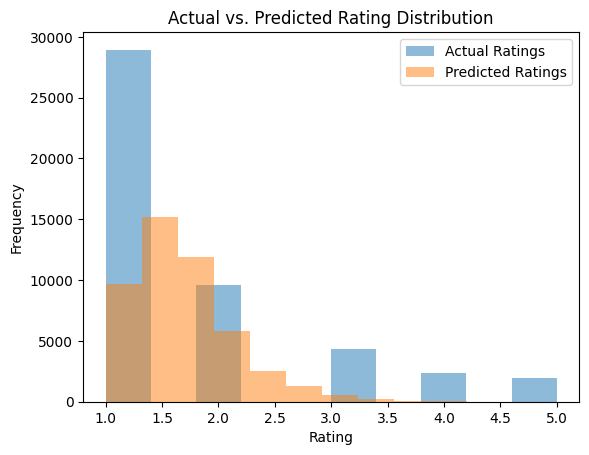

In [ ]:
test_predictions = sim_item_item_optimized.test(testset)

# Extract the actual ratings and predicted ratings
actual_ratings = [play_count.r_ui for play_count in test_predictions]
predicted_ratings = [play_count.est for play_count in test_predictions]

# Create a histogram to compare the distributions
plt.hist(actual_ratings, bins=10, alpha=0.5, label='Actual Ratings')
plt.hist(predicted_ratings, bins=10, alpha=0.5, label='Predicted Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.title('Actual vs. Predicted Rating Distribution')
plt.show()

# sns.distplot(actual_ratings), label ='Actual Ratings')
# sns.distplot(predicted_ratings, label = 'predicted_ratings')
# plt.legend()
# plt.show()

### **Observations:**
After tuning hyperparameters:
- **RMSE** for the test set has **decreased slightly** to **1.0391** compared to the baseline model (1.0394).
  - This indicates that the optimized model's predictions are closer to the actual play_count values on average, suggesting better accuracy.
- The **Precision** of the tuned model has **improved** very slightly **to 0.319** compared to the baseline model (0.307).
  - This means that a larger proportion of the recommended songs by the optimized model are actually relevant to the user's preferences.
- The **Recall** of the tuned model has **increased to 0.596** compared to the baseline model (0.562)
  - This indicates that the optimized model is better at capturing a larger portion of the relevant songs for the user.
- The **F1 score** of the tuned model has **increased to 0.416**, compared to the baseline model (0.397).
  - increased F1 score indicates a better balance between precision and recall.

Overall the model's **performance has improved** after hyperparameter tuning.

####**Steps**:
- **Predict rating for the interacted user-song pair with `user_id=64559`, and `song_id 211` using the optimized model**
- **Predict rating for the user  with `user_id= 11` and `user_id= 154` who have not interacted with `song_id = 211`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Predicting play count for interacted user-item pair: user_id = 64559 and song_id = 211
sim_item_item_optimized.predict('64559', '211', r_ui=2, verbose = True)

user: 64559      item: 211        r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='64559', iid='211', r_ui=2, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predict the play count for a non interacted user-song pair: user_id = 11 and song_id = 211
sim_item_item_optimized.predict('11', '211', verbose = True)

user: 11         item: 211        r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='11', iid='211', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predict the play count for a non interacted user-song pair: user_id = 154 and song_id = 211
sim_item_item_optimized.predict('154', '211', verbose = True)

user: 154        item: 211        r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='154', iid='211', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

### **Observations:**
- For the **interacted user-item pair:`user_id = 64559` , `song_id= 211`**:
  - The **optimized model** predicts a **play_count** of **1.70** for this user-item pair, which is the same as that predicted by the baseline model.

- For users who have not yet interacted with **`song_id= 211`**
  - The **optimized model** predicts a play_count of **1.70 by `user_id = 11` and `user_id =154`**, which is the **same as** that predicted by the **basline model**.

These observations indicate that the **tuned model performs better than the baseline model** in terms of predicting the ratings for the specified user-item pairs. The improvement in the prediction accuracy suggests that the tuning process has helped the model capture the underlying patterns and preferences of the users and items more effectively.



### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar songs to a given song** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar songs to the first song in the list with internal id 0, based on the `msd` distance metric.

In [ ]:
#  Finding five most similar songs to the item with inner id 00 is the inner id of the above user
sim_user_user_optimized.get_neighbors(0, k = 5)

[31, 82, 90, 116, 125]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not interacted yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song id which user_id has not interacted with yet
    for item_id in non_interacted_songs:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted play_count songs for this user

**Predicting top 10 songs for user_id = 64559 with similarity based recommendation system**

In [ ]:
# Make top 10 recommendations for any user_id = 64559 with an item-item similarity-based recommendation engine
recommendations = get_recommendations(df, user_id = 64559, top_n = 10, algo = sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_counts"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_counts'])

,song_id,predicted_play_counts
0,5692,2.230901
1,3518,2.121590
2,4298,2.115878
3,3551,2.113824
4,9127,2.102100
5,5823,2.101586
6,1406,2.094146
7,5999,2.091449
8,8086,2.086900
9,3718,2.081503


##### **Correcting the Ratings and Ranking the above songs:**

While comparing the play count of two songs, it is not only the play counts that describe the likelihood of the user to interact with that song. Along with the play count, the number of users who have interacted with that song also become important to consider. Due to this, we have calculated the "corrected_play_counts" for each song. Generally, higher the 'play count frequency of each song" (play_freq i.e. count of a play_count) of a song, more reliable the play_count is. To interpret the above concept, an song played 4 times with play_freq of 3 is less liked in comparison to an song played 3 times with a play_freq of 50. It has been empirically found that the likelihood of the song is directly proportional to the inverse of the square root of the play_freq of the song.

In [ ]:
def ranking_items(recommendations, final_play_count):

  # Sort the songs based on play counts
  ranked_items = final_play_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_items = ranked_items.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_counts']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_items['corrected_play_counts'] = ranked_items['predicted_play_counts'] - 1 / np.sqrt(ranked_items['play_freq']) # subtract to reduce the impact of songs with a high play_freq.

  # Sort the songs based on corrected play_counts
  ranked_items = ranked_items.sort_values('corrected_play_counts', ascending = False)

  return ranked_items

**Note:** In the **above-corrected rating formula**, quantity `1/np.sqrt(n)` is used to correct for the impact of songs with a too high/too low number of play counts.
- We can add the **quantity `1/np.sqrt(n)` instead of subtracting it to get more optimistic predictions**. But here we are **subtracting this quantity**, as there are some songs with play counts of 5 and **we have restricted our data set to a play count of upto 5 for a song**.

In [ ]:
# Applying the ranking_songs function on the final_play data

ranking_items(recommendations, final_play_count)

,song_id,play_freq,predicted_play_counts,corrected_play_counts
8,5692,118,2.230901,2.138843
1,3518,158,2.121590,2.042034
4,4298,141,2.115878,2.031663
3,3551,144,2.113824,2.030491
2,5823,145,2.101586,2.018541
5,5999,137,2.091449,2.006014
9,9127,107,2.102100,2.005426
7,1406,120,2.094146,2.002859
0,3718,159,2.081503,2.002198
6,8086,123,2.086900,1.996733


#### **Observations and Insights:**

- The column "song_id" represents the unique identifier of each song.
- The column "play_freq" indicates the frequency of each song being played in the dataset.
  - Song with song_id 3718 has the highest play frequency (159 times).
  - Song with song_id 9127 has the lowest play frequency (107 times).
- The column "predicted_play_count" shows the predicted play count for each song, which are generated by the recommendation algorithm.
  - These play counts are used to recommend songs to users.
  - Songs with higher predicted play_count are more likely to be recommended to users.
- The column "corrected_play_count" represents the corrected play counts, which are adjusted based on the play frequency of each song.
  - This adjustment is made to reduce the impact of songs with a high play frequency, as they may dominate the recommendation results due to their popularity.
- By considering the "corrected_play_count" column, we can rank the songs based on their corrected play counts, which allows us to provide more balanced and personalized recommendations to users.
- The ranking of songs based on corrected play counts suggests that song with **song_id 5692** (play_freq: 118) has the highest corrected play count (2.13), making it the **top recommendation for users**.
  - On the other hand, song with song_id 8086 (play_freq: 123) has the lowest corrected play count (1.99) among the top 10 recommendations.

Overall, the ranking of songs based on corrected play counts takes into account both the predicted play counts and the play frequency, resulting in a more refined and effective recommendation system for users.

## **Model 4: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

- Matrix factorization techniques **decompose the user-item interaction matrix into two lower dimensional matrices** one representing users and their preferences, and the other representing items and their attributes.
- **Latent features** in Matrix Factorization are **hidden patterns** or characteristics that are learned from the data and used to predict user-item interactions. **Decomposing the user-item interaction matrix into two matrices helps capture these latent features** and enables accurate recommendations.

**Advantages**:
- **Flexibility**: Matrix factorization captures complex user-item relationships, leading to accurate recommendations.
- **Data Sparsity**: Effective in handling sparse data scenarios where not all users have interacted with all items.
- **Personalization**: Creates user and item embeddings, enabling personalized recommendations.
- **Feature Extraction**: Learns meaningful features, providing insights into user preferences.
- **Scalability**: Techniques like SGD make it feasible for large datasets.

**Disadvantages**:
- **Cold Start Problem**: Matrix Factorization struggles with new users or items with limited interactions, as it relies on historical data for learning. It's challenging to provide accurate recommendations for those with few or no interactions.
- **Scalability**: For large datasets, decomposing the interaction matrix is computationally intensive and time-consuming. This scalability issue can require significant computational resources.
- **Lack of Interpretability**: While effective in capturing latent features, the factors learned in Matrix Factorization models aren't easily interpretable. This hinders understanding the basis of recommendations, especially compared to more interpretable methods.
- **Overfitting**: Matrix Factorization models are prone to overfitting, particularly when the number of latent features is set too high. This can lead to strong performance on training data but poor generalization to new, unseen data.


### **Singular Value Decomposition (SVD)**:

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [ ]:
# Build baseline model using svd

# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state =1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

NameError: ignored

### **Observations:**
- The **SVD matrix factorization baseline model** has an **RMSE = 1.025** on the test set, which is **reasonably low**. This indicates that the model's **predictions are closer to the actual ratings** and that the model has a reasonabley accurate understanding of user's preferences.

- Intuition of Precision: We are getting a **precision** of ~ 0.41, which means that out of all the recommended items **41%** are actually relevant to the user's preferences or interest.
  - A precision of 41% also means that the **users are likely to find the recommended products useful or appealing**.
  - Higher precision values suggest a higher proportion of relevant recommendations.

- Intuition of Recall: We are getting a **recall** of ~0.633, which means that out of all the relevant items **63.3%** are actually recommended.
  - A recall of 63.3% also means that the **baseline model is able to recommend a substantial portion of relevant products**, ensuring that users are exposed to a comprehensive set of items that match their interest.
  - Higher recall values suggest that the system is effective at capturing a large proportion of relevant items.

- The **F_1 score** of the baseline model is ~0.498. It indicates that mostly **recommended products were relevant and relevant products were recommended**.
    - An F1 score of ~ **50%** suggests that the model is effective at both providing relevant recommendations and covering a significant proportion of the relevant product space.
    - F1 score provides an overall assessment of the performance of the recommendation system, in terms of relevance and coverage.
    - A higher overall F1 score indicates better overall performance.




**Let's now predict the rating for an interacted user-song pair: `user_id = 64559` and `song_id = 211`**, with actual play_count = 2.

In [ ]:
# Making prediction for a sample user with an interacted product
svd.predict("64559", "211", r_ui = 2, verbose = True)

NameError: ignored

### **Observations:**

- The **SVD matrix factorization baseline model predicts** that the user with **`user_is = 64559` would play** the song with **`song_id = 211`** around **1.7 times, which is lower than the actual play_count of 2.0**.
- It seems that the model has under-estimated the play_count. We will try to fix this by **tuning the hyperparameters** of the model using GridSearchCV.

**Below we are predicting play_count for non interacted user-song pairs**:
- **`user_id = 11` and `song_id = 211`**
- **`user_id = 154` and `song_id = 211`.**


In [ ]:
# Making prediction for a sample user with a non interacted product
svd.predict("11", "211", verbose = True)

In [ ]:
# Making prediction for a sample user with a non interacted product
svd.predict("154", "211", verbose = True)

### **Observations:**
- The **SVD matrix factorization baseline model predicts** that the **`song_id = 211`** will be played **1.7 times** by both **`user_id = 11` and `user_id = 154'**.
  - These users have not seen /interacted with `song_id = 211` before.

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

In SVD, rating is predicted as -

$$\hat{r}_{u i}=\mu+b_{u}+b_{i}+q_{i}^{T} p_{u}$$

If user $u$ is unknown, then the bias $b_{u}$ and the factors $p_{u}$ are assumed to be zero. The same applies for item $i$ with $b_{i}$ and $q_{i}$.

To estimate all the unknown, we minimize the following regularized squared error:

$$\sum_{r_{u i} \in R_{\text {train }}}\left(r_{u i}-\hat{r}_{u i}\right)^{2}+\lambda\left(b_{i}^{2}+b_{u}^{2}+\left\|q_{i}\right\|^{2}+\left\|p_{u}\right\|^{2}\right)$$

The minimization is performed by a very straightforward **stochastic gradient descent**:

$$\begin{aligned} b_{u} & \leftarrow b_{u}+\gamma\left(e_{u i}-\lambda b_{u}\right) \\ b_{i} & \leftarrow b_{i}+\gamma\left(e_{u i}-\lambda b_{i}\right) \\ p_{u} & \leftarrow p_{u}+\gamma\left(e_{u i} \cdot q_{i}-\lambda p_{u}\right) \\ q_{i} & \leftarrow q_{i}+\gamma\left(e_{u i} \cdot p_{u}-\lambda q_{i}\right) \end{aligned}$$

There are many hyperparameters to tune in this algorithm, you can find a full list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse', 'mae'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [ ]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_optimized = SVD(n_epochs =30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE at k= 30
precision_recall_at_k(svd_optimized)


In [ ]:
test_predictions = svd_optimized.test(testset)

# Extract the actual ratings and predicted ratings
actual_ratings = [play_count.r_ui for play_count in test_predictions]
predicted_ratings = [play_count.est for play_count in test_predictions]

# Create a histogram to compare the distributions
plt.hist(actual_ratings, bins=10, alpha=0.5, label='Actual Ratings')
plt.hist(predicted_ratings, bins=10, alpha=0.5, label='Predicted Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.title('Actual vs. Predicted Rating Distribution')
plt.show()

**Matrix Factorization Hyperparameters and Tuning**:  Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

Matrix Factorization parameters, like the number of latent factors, regularization, learning rate, and iterations, impact the model's performance.

- **Number of Latent Factors**: This parameter determines the dimensionality of the latent space. A **higher number of latent factors can capture more complex patterns in the data but can also lead to overfitting** if not properly regularized.

- **Regularization Parameters (Lambda)**: Regularization helps **prevent overfitting by penalizing large values in the latent factor matrices**. Properly tuned regularization parameters can balance the model's ability to fit the training data while generalizing well to new data.

- **Learning Rate**: The learning rate controls the **step size taken in each iteration** while minimizing the error. **Too high** of a learning rate can **cause the model to diverge**, and **too low can result in slow convergence**.

- **Number of Iterations**: This parameter specifies how many **iterations or epochs the optimization algorithm should run for**. **Too few** iterations might **not allow the model to converge**, while **too many can lead to overfitting**.

- **Bias Terms**: Some Matrix Factorization models include user and item bias terms. These **bias terms capture global effects**, such as popular items, that are not captured by the latent factors.

To enhance hyperparameters:


**Tune Hyperparameters**: Use methods like grid search for optimal settings.
**Cross-Validation**: Assess generalization on unseen data via k-fold cross-validation.
**Experiment with Regularization**: Balance fitting and preventing overfitting.
**Include Additional Features**: Enhance by adding user demographics or content-based attributes.
**Ensemble Methods**: Combine predictions from diverse models.
**Explore Alternatives**: Consider techniques like NMF, PMF, or Bayesian Matrix Factorization. Experimentation and iteration are key to achieving better results.

### **Observations:**
After tuning hyperparameters of the SVD matrix factorization:
- **RMSE** for the test set has **decreased to 1.014** compared to the baseline model (1.0252).
- The **Precision** of the tuned model has **increased very slightly to 0.415** compared to baseline model (0.41)
  - The higher precision of the optimized model indicates that it provides a slightly better selection of relevant song recommendations.
- The **Recall** of the tuned model has **increased** very slightly to **0.635** compared to the baseline model (0.633)
  - The higher recall of the optimized model indicates that it captures a slightly larger proportion of relevant songs in its recommendations.
- The **F1 score** of the tuned model has **increased to 0.502** compared to the baseline model (0.498)
  - The higher F1 score of the optimized model indicates a better balance between precision and recall.

Overall the optimized model **performs slightly better than the baseline SVD model** after hyperparameter tuning.

####**Steps**:
- **Predict rating for the interacted user-song pair with `user_id=64559`, and `song_id 211` using the optimized model**
- **Predict rating for the user  with `user_id= 11` and `user_id= 154` who have not interacted with `song_id = 211`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Predicting play count for interacted user-item pair: user_id = 64559 and song_id = 211
svd_optimized.predict('64559', '211', r_ui=2, verbose = True)

In [ ]:
# Predict the play count for a non interacted user-song pair: user_id = 11 and song_id = 211
svd_optimized.predict('11', '211', verbose = True)

In [ ]:
# Predict the play count for a non interacted user-song pair: user_id = 154 and song_id = 211
svd_optimized.predict('154', '211', verbose = True)

### **Observations:**
- For the **interacted user-item pair:`user_id = 64559` , `song_id= 211`**:
  - The **optimized model** predicts a **play_count** of **1.70** for this user-item pair, which is the same as that predicted by the baseline model.

- For users who have not yet interacted with **`song_id= 211`**
  - The **optimized model** predicts a play_count of **1.70 by `user_id = 11` and `user_id =154`**, which is the **same as** that predicted by the **basline model**.


**Predicting top 10 songs for user_id = 64559 with SVD matrix factorization based recommendation system**

In [ ]:
# Make top 10 song recommendations for any user_id = 64559 with an item-item similarity-based recommendation engine
recommendations = get_recommendations(df, user_id = 64559, top_n = 10, algo = svd_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_counts"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_counts'])

##### **Correcting the Ratings and Ranking the above songs:**

While comparing the play count of two songs, it is not only the play counts that describe the likelihood of the user to interact with that song. Along with the play count, the number of users who have interacted with that song also become important to consider. Due to this, we have calculated the "corrected_play_counts" for each song. Generally, higher the 'play count frequency of each song" (play_freq i.e. count of a play_count) of a song, more reliable the play_count is. To interpret the above concept, an song played 4 times with play_freq of 3 is less liked in comparison to an song played 3 times with a play_freq of 50. It has been empirically found that the likelihood of the song is directly proportional to the inverse of the square root of the play_freq of the song.

In [ ]:
def ranking_items(recommendations, final_play_count):

  # Sort the songs based on play counts
  ranked_items = final_play_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_items = ranked_items.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_counts']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_items['corrected_play_counts'] = ranked_items['predicted_play_counts'] - 1 / np.sqrt(ranked_items['play_freq']) # subtract to reduce the impact of songs with a high play_freq.

  # Sort the songs based on corrected play_counts
  ranked_items = ranked_items.sort_values('corrected_play_counts', ascending = False)

  return ranked_items

**Note:** In the **above-corrected rating formula**, quantity `1/np.sqrt(n)` is used to correct for the impact of songs with a too high/too low number of play counts.
- We can add the **quantity `1/np.sqrt(n)` instead of subtracting it to get more optimistic predictions**. But here we are **subtracting this quantity**, as there are some songs with play counts of 5 and **we have restricted our data set to a play count of upto 5 for a song**.

In [ ]:
# Applying the ranking_songs function on the final_play data

ranking_items(recommendations, final_play_count)

#### **Observations and Insights:**

- The column "song_id" represents the unique identifier of each song.
- The column "play_freq" indicates the frequency of each song being played in the dataset.
  - Song with song_id 5531 has the highest play frequency (618 times).
  - Song with song_id 4831 has the lowest play frequency (97 times).
- The column "predicted_play_counts" shows the predicted play count for each song, which are generated by the recommendation algorithm.
  - These play countss are used to recommend songs to users.
  - Songs with higher predicted play counts are more likely to be recommended to users.
- The column "corrected_play_counts" represents the corrected ratings, which are adjusted based on the play frequency of each song.
  - This adjustment is made to reduce the impact of songs with a high play frequency, as they may dominate the recommendation results due to their popularity.
- By considering the "corrected_play_counts" column, we can rank the songs based on their corrected play countss, which allows us to provide more balanced and personalized recommendations to users.
- The ranking of songs based on corrected play countss suggests that song with **song_id 7224** (play_freq: 107) has the highest corrected play count (2.54), making it the **top recommendation for users**.
  - On the other hand, song with song_id 5158 (play_freq: 126) has the lowest corrected play count (2.04) among the top 10 recommendations.

Overall, the ranking of songs based on corrected ratiplay countsngs takes into account both the predicted play countss and the play frequency, resulting in a more refined and effective recommendation system for users.

## **Model 5: Cluster Based Recommendation System**

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they listen to different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

- **Co-clustering** is a set of techniques in **Cluster Analysis**. Given some **matrix A, we want to cluster rows of A and columns of A simultaneously**, this is a common task for user-item matrices.

- As it clusters both the rows and the columns simultaneously, it is also called **bi-clustering**. To understand the working of the algorithm, let A be m x n matrix, the goal is to generate co-clusters: a subset of rows that exhibit similar behavior across a subset of columns, or vice versa.

- Co-clustering is defined as two map functions:
rows -> row cluster indexes
columns -> column cluster indexes.

These map functions are learned simultaneously. It is **different from other clustering techniques** where we cluster **first the rows and then the columns**.

In [ ]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 30
precision_recall_at_k(clust_baseline, k = 30)


RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


### **Observations:**
- The **Co-clustering algorithm baseline model** has an **RMSE = 1.048** on the test set, which is **reasonably low**. This indicates that the model's **predictions are closer to the actual ratings** and that the model has a reasonabley accurate understanding of user's preferences.

- Intuition of Precision: We are getting a **precision** of ~ 0.397, which means that out of all the recommended items ~**40%** are actually relevant to the user's preferences or interest.
  - A precision of 40% also means that the **users are likely to find the recommended products useful or appealing**.
  - Higher precision values suggest a higher proportion of relevant recommendations.

- Intuition of Recall: We are getting a **recall** of ~0.582, which means that out of all the relevant items **58.2%** are actually recommended.
  - A recall of 58.2% also means that the **baseline model is able to recommend a substantial portion of relevant products**, ensuring that users are exposed to a comprehensive set of items that match their interest.
  - Higher recall values suggest that the system is effective at capturing a large proportion of relevant items.

- The **F_1 score** of the baseline model is ~0.472. It indicates that mostly **recommended products were relevant and relevant products were recommended**.
    - An F1 score of **47.2%** suggests that the model is effective at both providing relevant recommendations and covering a significant proportion of the relevant product space.
    - F1 score provides an overall assessment of the performance of the recommendation system, in terms of relevance and coverage.
    - A higher overall F1 score indicates better overall performance.

We will try to improve the model later by using **GridSearchCV by tuning different hyperparameters** of this algorithm.


**Let's now predict the rating for an interacted user-song pair: `user_id = 64559` and `song_id = 211`**, with actual play_count = 2.

In [ ]:
# Making prediction for a sample user with an interacted product
clust_baseline.predict(64559, 211, r_ui = 2, verbose = True)

user: 64559      item: 211        r_ui = 2.00   est = 1.89   {'was_impossible': False}


Prediction(uid=64559, iid=211, r_ui=2, est=1.8946279310361316, details={'was_impossible': False})

### **Observations:**

- The **co-clustering baseline model predicts** that the user with **`user_id = 64559` would play** the song with **`song_id = 211`** around **1.89 times, which is close to the actual play_count of 2.0**.
- It seems that the model has under-estimated the play_count. We will try to fix this by **tuning the hyperparameters** of the model using GridSearchCV.

**Below we are predicting play_count for non interacted user-song pairs**:
- **`user_id = 11` and `song_id = 211`**
- **`user_id = 154` and `song_id = 211`.**


In [ ]:
# Making prediction for a sample user with a non interacted product
clust_baseline.predict("11", "211", verbose = True)

user: 11         item: 211        r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='11', iid='211', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

In [ ]:
# Making prediction for a sample user with a non interacted product
clust_baseline.predict("154", "211", verbose = True)

user: 154        item: 211        r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='154', iid='211', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

### **Observations:**
- The **co-clustering baseline model predicts** that the **`song_id = 211`** will be played **1.7 times** by both **`user_id = 11` and `user_id = 154'**.
  - This users have not seen /interacted with `song_id = 211` before.

### **Improving clustering-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `CoClustering` algorithm. Let's try to understand the different hyperparameters of this algorithm.

- **n_cltr_u** (int) – Number of **user clusters**. The default value is 3.
- **n_cltr_i** (int) – Number of **item clusters**. The default value is 3.
- **n_epochs** (int) – Number of **iteration of the optimization loop**. The default value is 3.
- **random_state** (int, RandomState instance from NumPy, or None) – Determines the RNG that will be used for initialization. If int, random_state will be used as a seed for a new RNG. This is useful to get the same initialization over multiple calls to fit(). If RandomState instance, this same instance is used as RNG. If None, the current RNG from NumPy is used. The default value is None.
- **verbose** (bool) – If True, the current epoch will be printed. The default value is False.

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [2, 3, 4, 5, 6, 7, 8], 'n_cltr_i': [2, 3, 4, 5, 6, 7, 8], 'n_epochs': [10, 20, 30, 40, 50, 60,70]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0348326192725488
{'n_cltr_u': 2, 'n_cltr_i': 7, 'n_epochs': 70}


**Coclustering Model Hyperparameters and Tuning:**: Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

The hyperparameters for CoClustering typically include:

- **n_cltr_u**: Number of clusters for users.
- **n_cltr_i**: Number of clusters for items.
- **n_epochs**: Number of iterations for optimization.
- **random_state**: Seed for random initialization.
- **method**: The algorithm used for optimization (e.g., 'random', 'bipartite', 'eac').
- **tol**: Tolerance for stopping criterion.
- **verbose**: Display progress information.

Adjusting the hyperparameters can enhance the model:

- **Number of Clusters**: Optimize the cluster count for better grouping.
- **Initialization**: Different starting points can affect convergence.
- **Regularization**: Balance between fitting and preventing overfitting.
- **Algorithm Variation**: Try different algorithms (e.g., BiCrossValidation, RandomPartitioner) to compare results.
- **Evaluate Metrics**: Use metrics like RMSE, precision, recall, F1-score for performance assessment.
- **Ensemble Approaches**: Combine outputs from multiple models for improved recommendations.

Experiment, fine-tune, and evaluate to uncover the best parameter configuration for the most accurate and relevant song recommendations.

Once the grid search is **complete**, we can get the **optimal values** for each of those hyperparameters as shown above.

We will build **final model** by using tuned values of the hyperparameters received after using the Grid search cross-validation above.

In [ ]:
# Train the tuned Coclustering algorithm

# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 2, n_cltr_i = 4, n_epochs = 30, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 30
precision_recall_at_k(clust_tuned)


RMSE: 1.0383
Precision:  0.394
Recall:  0.584
F_1 score:  0.471


### **Observations:**
After tuning hyperparameters of the co-clustering model:
- **RMSE** for the test set has **decreased to 1.038** compared to the baseline model (1.0487).
 - The **Precision** of the tuned model has **decreased very slightly to 0.394** compared to baseline model (0.397)
  - In this case, both models have relatively low precision, indicating that there is **room for improvement in recommending more relevant songs**.
  - Higher precision of the optimized model indicates that it provides a slightly better selection of relevant song recommendations.
- The **Recall** of the tuned model has **increased** very slightly to **0.584** compared to the baseline model (0.582)
  - In this case, both models have moderate recall, suggesting that they are able to capture a significant portion of relevant songs.
  - A higher recall value indicates that the algorithm successfully recommended a larger portion of songs that users actually liked.
- The **F1 score** of the tuned model has **increased ver slightly to 0.471** compared to the baseline model (0.472)
  - The F1 score accounts for the trade-off between precision and recall, and a higher value is desired to achieve a better balance between these two metrics.

**Overall performance** between the **baseline and the optimized model is quite comparable**.
  - However, there is room for improvement in terms of precision and F1 score, indicating that further optimization of the algorithm or exploration of different approaches might lead to more accurate and relevant song recommendations.
  - Additionally, considering other factors such as user demographics or incorporating content-based features could potentially enhance the recommendation system's performance further.

####**Steps**:
- **Predict rating for the interacted user-song pair with `user_id=64559`, and `song_id 211` using the optimized model**
- **Predict rating for the user  with `user_id= 11` and `user_id= 154` who have not interacted with `song_id = 211`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Predicting play count for interacted user-item pair: user_id = 64559 and song_id = 211
clust_tuned.predict('64559', '211', r_ui=2, verbose = True)

user: 64559      item: 211        r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='64559', iid='211', r_ui=2, est=1.6989607635206787, details={'was_impossible': False})

In [ ]:
# Predict the play count for a non interacted user-song pair: user_id = 11 and song_id = 211
clust_tuned.predict('11', '211', verbose = True)

user: 11         item: 211        r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='11', iid='211', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

In [ ]:
# Predict the play count for a non interacted user-song pair: user_id = 154 and song_id = 211
clust_tuned.predict('154', '211', verbose = True)

user: 154        item: 211        r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='154', iid='211', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

### **Observations:**
- For the **interacted user-item pair:`user_id = 64559` , `song_id= 211`**:
  - The **optimized model** predicts a **play_count** of **1.70** for this user-item pair, which is the same as that predicted by the baseline model.

- For users who have not yet interacted with **`song_id= 211`**
  - The **optimized model** predicts a play_count of **1.70 by `user_id = 11` and `user_id =154`**, which is the **same as** that predicted by the **basline model**.


#### **Implementing the recommendation algorithm based on optimized CoClustering model**

**Predicting top 10 songs for user_id = 64559 with clustering based recommendation system**

In [ ]:
# Make top 10 song recommendations for any user_id = 64559 with an Co-clustering based optimized model
recommendations = get_recommendations(df, user_id = 64559, top_n = 10, algo = clust_tuned)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_counts"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_counts'])

,song_id,predicted_play_counts
0,7224,3.164811
1,5653,2.906738
2,9942,2.834600
3,5531,2.744124
4,8831,2.594168
5,4284,2.511410
6,8138,2.506336
7,8092,2.497647
8,3658,2.496139
9,6230,2.438996


##### **Correcting the Ratings and Ranking the above songs:**

While comparing the play count of two songs, it is not only the play counts that describe the likelihood of the user to interact with that song. Along with the play count, the number of users who have interacted with that song also become important to consider. Due to this, we have calculated the "corrected_play_counts" for each song. Generally, higher the 'play count frequency of each song" (play_freq i.e. count of a play_count) of a song, more reliable the play_count is. To interpret the above concept, an song played 4 times with play_freq of 3 is less liked in comparison to an song played 3 times with a play_freq of 50. It has been empirically found that the likelihood of the song is directly proportional to the inverse of the square root of the play_freq of the song.

In [ ]:
def ranking_items(recommendations, final_play_count):

  # Sort the songs based on play counts
  ranked_items = final_play_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_items = ranked_items.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_counts']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_items['corrected_play_counts'] = ranked_items['predicted_play_counts'] - 1 / np.sqrt(ranked_items['play_freq']) # subtract to reduce the impact of songs with a high play_freq.

  # Sort the songs based on corrected play_counts
  ranked_items = ranked_items.sort_values('corrected_play_counts', ascending = False)

  return ranked_items

**Note:** In the **above-corrected rating formula**, quantity `1/np.sqrt(n)` is used to correct for the impact of songs with a too high/too low number of play counts.
- We can add the **quantity `1/np.sqrt(n)` instead of subtracting it to get more optimistic predictions**. But here we are **subtracting this quantity**, as there are some songs with play counts of 5 and **we have restricted our data set to a play count of upto 5 for a song**.

In [ ]:
# Applying the ranking_songs function on the final_play data

ranking_items(recommendations, final_play_count)

,song_id,play_freq,predicted_play_counts,corrected_play_counts
8,7224,107,3.164811,3.068138
7,5653,108,2.906738,2.810513
5,9942,150,2.834600,2.752951
0,5531,618,2.744124,2.703898
9,8831,107,2.594168,2.497495
4,4284,461,2.511410,2.464835
2,8138,524,2.506336,2.462651
1,8092,550,2.497647,2.455007
6,3658,131,2.496139,2.408768
3,6230,471,2.438996,2.392918


### **Observations:**

- The column "song_id" represents the unique identifier of each song.
- The column "play_freq" indicates the frequency of each song being played in the dataset.
  - Song with song_id 5531 has the highest play frequency (618 times).
  - Songs with song_id 7224 and song_id 8831 have the lowest play frequency (107 times).
- The column "predicted_play_counts" shows the predicted play counts for each song, which are generated by the recommendation algorithm.
  - These play counts are used to recommend songs to users.
  - Songs with higher predicted play counts are more likely to be recommended to users.
- The column "corrected_play_counts" represents the corrected play counts, which are adjusted based on the play frequency of each song.
  - This adjustment is made to reduce the impact of songs with a high play frequency, as they may dominate the recommendation results due to their popularity.
- By considering the "corrected_play_counts" column, we can rank the songs based on their corrected play counts, which allows us to provide more balanced and personalized recommendations to users.
- The ranking of songs based on corrected play counts suggests that song with **song_id 7224** (play_freq: 107) has the highest corrected play count (3.06), making it the **top recommendation for users**.
  - On the other hand, song with song_id 6230 (play_freq: 471) has the lowest corrected play count (2.39) among the top 10 recommendations.

Overall, the ranking of songs based on corrected ratings takes into account both the predicted ratings and the play frequency, resulting in a more refined and effective recommendation system for users.

## **Model 6: Content Based Recommendation System**

- Content-based recommendation systems are a type of recommendation system that suggests items to users based on the features or attributes of the items themselves, as well as the user's preferences and past interactions.
- These systems rely on analyzing the content of items and creating profiles for both users and items to make recommendations.
- The idea is to recommend items that are similar in content to those the user has shown interest in.

**Advantages**:
- **No Cold Start Problem**: Content-based systems can work well even when there is limited data available about users or items, which is beneficial for new or less-popular items. This is in contrast to collaborative filtering methods that struggle with cold start scenarios.

- **Personalization**: Content-based recommendations are inherently personalized because they take into account the individual user's preferences and past behavior. This leads to relevant and tailored recommendations.

- **Transparency**: Content-based systems offer transparency in recommendations since they are based on features and attributes that are understandable to both users and system administrators. Users can often understand why a particular item is being recommended.

- **Diverse Recommendations**: Content-based systems can recommend items that are diverse but still relevant to the user's interests. This can lead to a more engaging user experience.

**Disadvantages**:
- **Limited Serendipity**: Since content-based recommendations rely on existing user preferences and item features, they might not introduce users to entirely new and unexpected items, leading to potential "filter bubbles."

- **Feature Engineering**: The effectiveness of content-based recommendations heavily relies on accurately selecting and engineering relevant features for items and users. This process can be time-consuming and might require domain expertise.
  - Recommendations might become too specialized and reflect biases inherent in the features used for profiling. Users might end up receiving recommendations that are too narrow in scope.

- **Limited Exploration**: Content-based systems may not effectively introduce users to new items that are different from their past preferences, which can hinder user exploration and discovery.

- **Limited Social Influence**
: Content-based systems don't consider the influence of social relationships or user-to-user interactions, which can be important in certain recommendation scenarios.

### **So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. We can take those song features into account and build a content-based recommendation system.**



In a **content-based recommendation system**, we will use the feature - **text**, i.e., data from "title", "release", and "artist_name" columns to find similar songs.

In [ ]:
df_content = df.copy()
df_content.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


We will combine the columns - **title**, **release**, and **artist_name** to create a text-based feature column **text** and apply the **TF-IDF** feature extraction technique to extract features, which we later use to compute similar songs based on these texts.

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_content ['text'] = df['title'] + ' ' + df['release'] + ' ' + df['artist_name']
df_content.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
df_content.shape

(117876, 8)

Now, we will **keep only four columns** - user_id, song_id, play_count, and text. We will **drop** the **duplicate titles** from the data and **make** it the **title column as the index** of the dataframe.

In [ ]:
# create a df_small data set with 4 columns# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_content[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
df_small.shape

(561, 4)

In [ ]:
# # Create the series of indices from the data
indices = pd.Series(df_small.index)
indices[:5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [ ]:
# Importing necessary packages to work with text data

# Importing nltk (natural language toolkit library)
import nltk
nltk.download('omw-1.4')

# Download punkt library
# Downloading punctuations
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer to do tokenization
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer  used to create the computational vectors
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data**. Before that, let's see some **terminology**.
- **stopwords:** A stop word is a commonly used word (such as “the”, “a”, “an”, or “in”) that does not contain information in the text and can be ignored.
- **Lemmatization:** Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analyzed as a single item. For example, runs, running, and ran are all forms of the word run, therefore run is the lemma of all these words.

In [ ]:
# Create a function to tokenize the text

# Create the tokenize function
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

### **Feature Extraction**

Below are some of the ways to extract features from texts:
- Bag of words
- TF-IDF
- One hot encoding
- Word vectors

Here, we will be using **TF-IDF** as a feature extraction technique.

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
# Making the DataFrame of song_tfidf data
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have **extracted features from the text data**. Now, we can find similarities between songs using these features. We will use cosine similarity to calculate the similarity.

In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

  recommended_songs = []

  # Create the series of indices from the data
  indices = pd.Series(df_small.index)

  # Getting the index of the song that matches the title
  idx = indices[indices == title].index[0]

  # Creating a Series with the similarity scores in descending order
  score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

  # Getting the indexes of the 10 most similar songs
  top_10_indexes = list(score_series.iloc[1 : 11].index)
  print(top_10_indexes)

  # Populating the list with the titles of the best 10 matching songs
  for i in top_10_indexes:
      recommended_songs.append(list(df_small.index)[i])

  return recommended_songs

Recommending 10 songs similar to 'Learn to Fly'

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)


[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

### **Observations:**
- The song <i>Learn to Fly</i> belongs to **Rock** genre, and the **majority of our recommendations** lie in one or more of these genres. It implies that the resulting recommendation system is working well.

## **Conclusion and Recommendations**

### **Milestone Question #1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:


**Summary**:

- In this project, we built recommendation systems using six different algorithms. They are as follows:

  - Popularity / Rank based recommendation system using average ratings.
  - Collaborative filtering rcommendation system:
    - User-User similarity based collaborative filtering.
    - Item-Item similarity based collaborative filtering.
  - Model-based collaborative filtering (matrix factorization).
    - Singular Value Decomposition (SVD) Model.
  - Cluster based recommendation system.
  - Content based recommendation system.
    - TF-IDF as a feature extraction technique.

- The surprise library was used to demonstrate"user-user similarity-based collaborative filtering," "item-item similarity-based collaborative filtering," and "model-based collaborative filtering (matrix factorization)", and "CoClustering" algorithms.

  - For these algorithms, grid search cross-validation is used to find the optimal hyperparameters for the data, and related predictions are created using the optimal hyperparameters.

  - For performance evaluation of these models precision@k and recall@k are used. Using these two metrics, the F_1 score is calculated for each working model.

- Natural language toolkit library was used to pre process the data to use for the TF-IDF feature extraction technique.

**Rank-Based Recommendation System:**

- The rank-based recommendation system utilized the average rating and minimum interactions to recommend top products to users.
- It is a simple approach and can be effective in providing popular items based on average ratings and minimum interaction thresholds.
- However, it does not take into account personalized user preferences and item characteristics.

**User-User Similarity-Based Collaborative Filtering:**

- This approach relied on finding similarities between users and recommending items based on the preferences of similar users.
- The optimized model performs reasonably well with a **RMSE of 1.06, a precision of 0.41, recall of 0.62, and an F1 score of 0.50**.
- While it is effective in capturing user preferences, it may face challenges in scalability and sparsity issues.

**Item-Item Similarity-Based Collaborative Filtering:**

- This model finds similarities between items and recommends similar items to users.
- The optimized model outperforms the user-user similarity-based approach with a lower **RMSE of 1.03**, but has a slightly lower **precision (0.32), recall (0.59) and F1 score (0.41)** in comparison.
- This model is more scalable and can handle sparse data effectively.

**SVD Model Based Collaborative Filtering - Matrix Factorization:**

- The optimized SVD-based model using matrix factorization provides the **best performance among the three collaborative filtering approaches, with an RMSE of 1.01, precision of 0.42, recall of 0.64, and an F1 score of 0.50**.
- Matrix factorization-based models can capture latent factors and provide better recommendations, especially for sparse datasets.

**Clustering Based Model:**

- The optimized Clustering based model using Co-Clustering algorithm provides the **best performance** among the four approaches, with an **RMSE of 1.03, precision of 0.40, recall of 0.60, and an F1 score of 0.50**.
- Clustering based recommendation systems group users or items into clusters based on their interaction patterns and can handle the cold-start problem and make personalized recommendations even for new users with limited data.

**Content Based Model - TF-IDF text vectorization:**

- The content based recommendation system utilizes item attributes, such as text descriptions, to make recommendations. Recommendations were generated using TF-IDF text vectorization.

###**Relative Performance**:

 **Matrix Factorization (SVD) technique** stands out as the **best performer** among the collaborative filtering and cluster-based methods, in terms of RMSE, Precision, Recall, and F1 Score It indicates that Matrix Factorization captures underlying patterns well.

 Additionally, the Content-Based approach provides a different perspective on recommendations by considering textual features, but its evaluation requires a different set of metrics tailored to its approach.

- **Matrix Factorization (SVD) Technique**:
  Matrix Factorization technique, specifically using Singular Value Decomposition (SVD), **shows better performance across multiple metrics including RMSE, Precision, Recall, and F1 Score**.
    - "Matrix Factorization" is able to effectively capture latent patterns in the user-item interaction matrix, resulting in more accurate recommendations.
    - This technique is able to generalize well to unseen data and provide meaningful recommendations.

- **Collaborative Filtering Techniques (User-User and Item-Item CF):**

  - Collaborative filtering techniques, including both User-User and Item-Item CF, show **slightly lower performance compared to Matrix Factorization** in terms of RMSE, Precision, Recall, and F1 Score.
    - While they are effective in identifying user-item interactions, they might not capture underlying patterns as effectively as Matrix Factorization, leading to slightly less accurate recommendations.

- **Cluster-Based Recommendations:**

  - The performance metrics indicate that Cluster-Based recommendations have **lower RMSE, Precision, Recall, and F1 Score compared to Matrix Factorization**.
    - This suggests that the cluster-based approach might not be capturing the nuances of user preferences and interactions as well as the Matrix Factorization technique.

- **Content-Based Recommendations:**

  - Content-Based recommendations are based on textual features of the songs and are not directly comparable to the other models using the RMSE, Precision, Recall, and F1 Score metrics.
    - Content-Based and Collaborative Filtering approaches are fundamentally different and rely on different sources of information to make recommendations.

###**Scope for Improvement**:
- **Further Optimization and Hyperparameter Tuning:**
  - While the SVD model has demonstrated good performance in terms of RMSE, precision, recall, and F1 score, there's often room for improvement through hyperparameter tuning. Hyperparameters are settings that determine how the model learns from the data. -These might include the number of latent factors, regularization parameters, learning rates, and more. By experimenting with different combinations of these hyperparameters and using techniques like grid search or random search, you can potentially find configurations that result in even better predictive accuracy and recommendation quality.

- **Incorporating Additional Data Sources:**
  - SVD models primarily rely on the user-item interaction matrix to make recommendations. However, there's potential to incorporate additional data sources to enhance the recommendation system's performance. For example, you could consider including user demographic information, temporal patterns, item attributes, or even external data like social media activity or user-generated content. By enriching the model with more features and data points, it can capture a more comprehensive view of user preferences and improve the quality of recommendations.

- **Iterating, Experimenting, and Evaluation:**
  - The process of refining a recommendation system is iterative. It involves trying out different techniques, hyperparameters, and data sources, and then evaluating their impact on the quality of recommendations.
  - This could be done using offline **evaluation metrics as well as A/B testing in a live environment**. Experimentation is crucial to understand how changes affect the user experience and recommendation effectiveness. Keep track of the results and make informed decisions based on the outcomes of these experiments.

- **Considering Other Factors:**
  - It's important to consider user feedback and preferences. Collecting feedback from users and using it to fine-tune the model can lead to a more personalized experience.
  - Additionally, align the recommendations with the business objectives. For instance, if the goal is to increase user engagement, recommendations should be tailored to encourage interaction.
   - Scalability is another important consideration, especially if the system needs to handle a growing user base and larger datasets.

In summary, the **choice of the SVD recommendation system is a great starting point, but the journey doesn't end there**. By further optimizing hyperparameters, incorporating additional data, iterating through experiments, and aligning the system with business goals and user feedback, you can create a recommendation system that provides valuable and relevant recommendations to users, contributing to an enhanced user experience and achieving business objectives.

### **Milestone Question #2. Refined insights**:
The most meaningful insights from the data relevant to our problem are:
- The data includes 3155 unique users and 563 unique songs.
  - Not every user has heard every song in this dataset.
  - There is a **possibility of 3155 * 563 = 1,776,485 user-song interactions** in the data set. But **we only have 117876 user-song interactions** i.e. not every user has heard every song in this dataset.

- **Interactions between users and songs are right-skewed, with a small group of users responsible for a significant portion of interactions and vise versa**.
- The **most popular song has 751 interactions, while the most active user has played 243 songs, suggesting room for more interactions**.  Not every user has heard every song in this dataset.
These insights highlight the potential for a recommendation system to suggest songs to users they haven't interacted with, indicating **potential for enhancing engagement, music discovery and revenue growth through untapped interactions**.


### **Milestone Question #3 - Proposal for the Final Solution Design**:

The analysis of the music streaming data has illuminated possibilities for improving user experience and engagement. This can be achieved by implementing a hybrid recommendation system that integrates Progressive Enhancement principles.

The proposed **hybrid model** consists of a combination of the following recommendation techniques: **Collaborative Filtering (Matrix Factorization - SVD) + Content-Based Filtering (TF-IDF) + Popularity-Based Recommendation System.**

- **Collaborative Filtering (Matrix Factorization - SVD)**:
  - Matrix Factorization using Singular Value Decomposition (SVD) has demonstrated superior performance across multiple evaluation metrics, including RMSE, Precision, Recall, and F1 Score.
  - It effectively captures latent patterns in user-item interactions and provides accurate recommendations.
  - This technique is backed by its ability to generalize well to unseen data and its capacity to handle sparse datasets.

- **Content-Based Filtering (TF-IDF)**:
  - The Content-Based approach, utilizing TF-IDF text vectorization, enhances recommendations by considering textual features of songs.
  - While its performance is not directly comparable using the metrics used, it caters to users who enjoy specific genres or themes.
  - Its strength lies in its capacity to provide recommendations based on song attributes beyond user-item interactions.

- **Popularity-Based Recommendation System**:
  - Integrating real-time trending data adds dynamism to recommendations
  - Although not evaluated using the same metrics, popularity-based recommendation system enhance user engagement by keeping them updated with the latest hits and trends.
  - This addition addresses the challenge of user retention and provides a relevant recommendation component.


#**Music Recommendation System - Final Submission Document**

###**Executive Summary**:

The analysis conducted in this project has uncovered significant insights into the potential for recommending songs to users on a music streaming platform. These key findings highlight the diversity of user interactions, the untapped potential for recommendations, and the necessity for a comprehensive solution.

In the processed dataset, encompassing 3155 unique users and 563 distinct songs, the dataset's diversity lays the foundation for delivering personalized music suggestions. The distribution of user-song interactions is skewed to the right, indicating that most users have engaged with only a subset of songs, while a few users have interacted with a larger pool of songs.

The potential for interactions is extensive, with a calculated potential of 1,776,485 user-song interactions (3155 * 563). This illustrates the system's complexity and the room for interactions. However, it's crucial to acknowledge that not every user has engaged with all songs, underscoring the importance of addressing data sparsity to ensure more accurate recommendations.

These insights underscore the necessity for a recommendation system capable of catering to diverse user preferences, effectively addressing data sparsity, and leveraging untapped interactions. Such a system holds the potential to enhance user engagement, satisfaction, and revenue generation by delivering personalized and meaningful music recommendations.








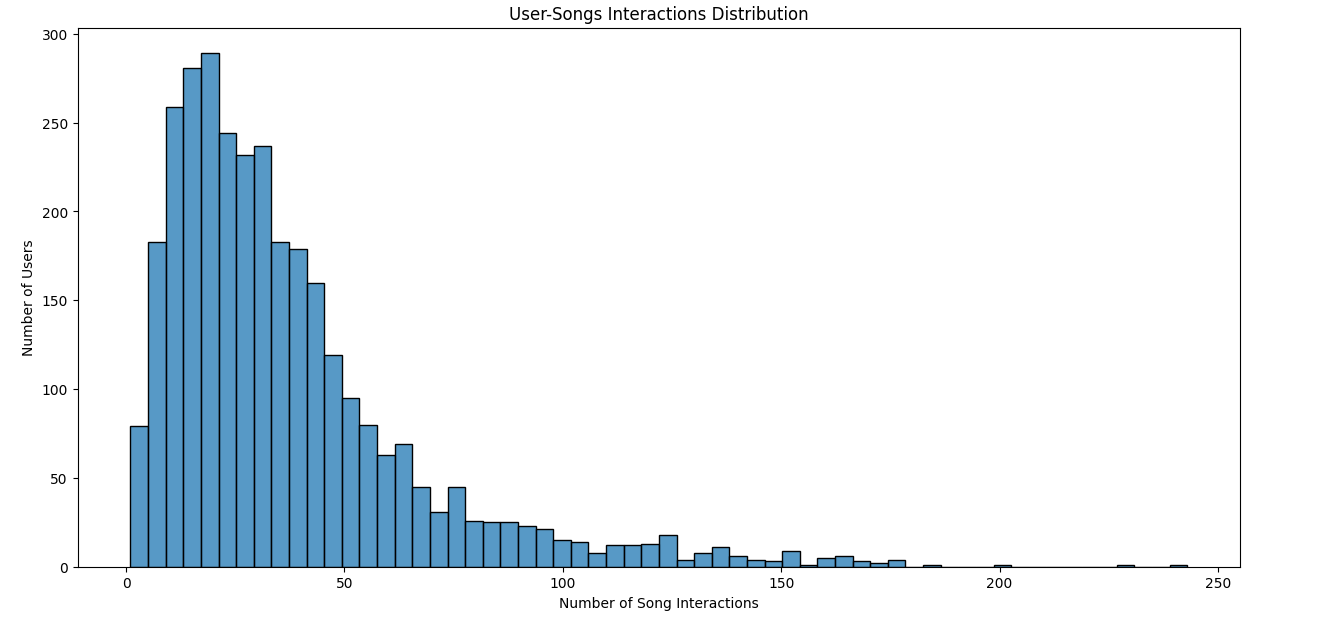

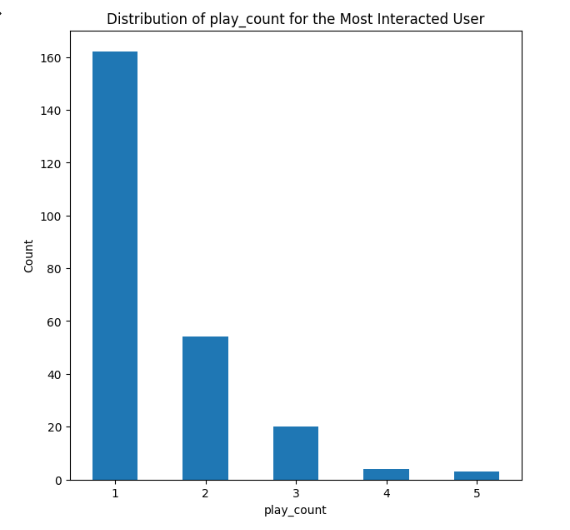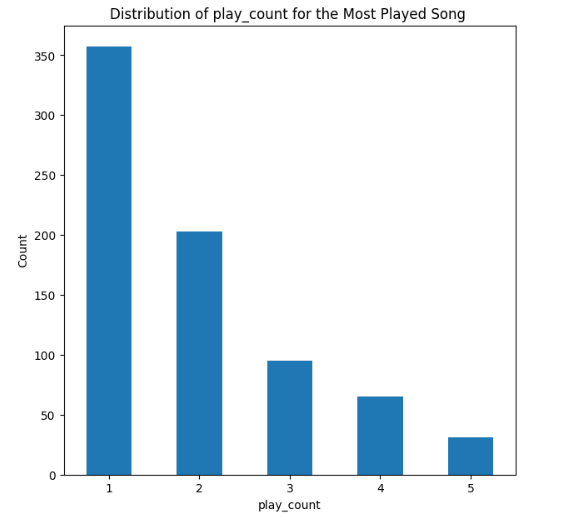

####**Final Proposed Model Specifications**:

The analysis of the music streaming data has illuminated possibilities for improving user experience and engagement. This can be achieved by implementing a hybrid recommendation system that integrates Progressive Enhancement principles.

The proposed **hybrid model** consists of a combination of the following recommendation techniques: **Collaborative Filtering (Matrix Factorization - SVD) + Content-Based Filtering (TF-IDF) + Popularity-Based Recommendation System.**

- **Collaborative Filtering (Matrix Factorization - SVD)**:
  - Matrix Factorization using Singular Value Decomposition (SVD) has demonstrated superior performance across multiple evaluation metrics, including RMSE, Precision, Recall, and F1 Score.
  - It effectively captures latent patterns in user-item interactions and provides accurate recommendations.
  - This technique is backed by its ability to generalize well to unseen data and its capacity to handle sparse datasets.

- **Content-Based Filtering (TF-IDF)**:
  - The Content-Based approach, utilizing TF-IDF text vectorization, enhances recommendations by considering textual features of songs.
  - While its performance is not directly comparable using the metrics used, it caters to users who enjoy specific genres or themes.
  - Its strength lies in its capacity to provide recommendations based on song attributes beyond user-item interactions.

- **Popularity-Based Recommendation System**:
  - Integrating real-time trending data adds dynamism to recommendations
  - Although not evaluated using the same metrics, popularity-based recommendation system enhance user engagement by keeping them updated with the latest hits and trends.
  - This addition addresses the challenge of user retention and provides a relevant recommendation component.

**Progressive Enhancement Implementation**:

The hybrid recommendation system can be  implemented using the **Progressive Enhancement** principles:

- **Initial Stage (Stage 1 - Collaborative Filtering)**:
  - Begin with the deployment of the SVD-based collaborative filtering model.
  - Users will receive recommendations based on their historical interactions.
  - Users who are new or have limited interactions will benefit from popular and well-rated recommendations based on average ratings.

- **Intermediate Stage (Stage 2 - Content-Based Integration)**:
  - Introduce the content-based filtering component.
  - Users will now receive recommendations based on song attributes such as lyrics, genres, and other features.
  - Gradually increase the influence of content-based recommendations in the hybrid model, balancing them with collaborative filtering.

- **Advanced Stage (Stage 3 - Popularity-Based / Trending Songs / Integration)**:
  - Integrate real-time trending data to offer recommendations of currently popular songs.
  - Combine trending song recommendations with collaborative and content-based recommendations to ensure diversity and dynamism in suggestions.

The proposed hybrid recommendation system, combining collaborative filtering, content-based filtering, and trending song recommendations, is designed to enhance user engagement and satisfaction on a digital music platform platform. By offering accurate, diverse, and dynamic recommendations, the system aims to optimize the music discovery experience and contribute to increased user retention and revenue.

###**Problem and Solution Summary**:

####**Summary of the Problem**:
- The problem revolves around the need for **personalized song recommendations in the era of digital music platforms** like Spotify. **The abundance of music options poses a challenge for users to discover songs aligned with their preferences**. To address this, the project aims to build a robust recommendation system that can predict and suggest the top 10 songs a user would likely enjoy. The goal is to enhance user experience, increase engagement, and drive revenue for the platform. Key questions include how to analyze user preferences, what factors influence song choices, and how to design an accurate recommendation algorithm. The project utilizes data science and machine learning techniques, focusing on a subset of the Million Song Dataset to create an effective recommendation system.

####**The Reason for the Proposed Solution Design**:
- The proposed **solution design** of a hybrid recommendation system that integrates progressive enhancement principles is **well-suited to address the challenges faced in an era od music platforms**.
  - In the digital music era, where users are inundated with a vast array of song choices, the **primary issue revolves around enhancing user experience and engagement**.
  - The existing scenario of information overload makes it **imperative to offer personalized and relevant song recommendations to users**.

- The complexity of user preferences and the dynamic nature of music consumption patterns require a **multifaceted approach**.
  - A singular recommendation technique might not capture the diverse range of user preferences and the evolving trends in the music industry.
  - The hybrid recommendation system combines multiple models, each addressing specific aspects of user preferences, thereby creating a **well-rounded and adaptable solution**.

- The progressive enhancement principles, integrated into the solution design, further augment its effectiveness.
  - By **gradually enhancing the recommendation system's capabilities**, **users** are not overwhelmed with an influx of information. Instead, they **experience a seamless transition from basic recommendations to more personalized and intricate suggestions**.
  - This gradual progression ensures that **new users receive immediate value through popular and well-rated recommendations** while simultaneously introducing them to more refined suggestions as the system learns from their interactions.

- This design aligns seamlessly with the problem's essence as it offers a holistic solution to the challenge of song discovery. The hybrid nature of the recommendation system caters to user preferences, captures user interactions, and adapts to changing trends. It efficiently answers the key questions by utilizing various algorithms to analyze user interactions, identify influential factors, and generate accurate predictions. By creating a **comprehensive recommendation system, the proposed solution effectively enhances user experience, increases engagement, and ultimately drives revenue for the music streaming platform**.

####**Impact of the Proposed Solution on the Problem / Business**:

- Implementing a hybrid recommendation system that also integrates progressive enhancement principles can have significant impacts on the music streaming platform's problem of providing personalized song recommendations to users.

- **Benefits**:

  - **Personalized Experience**: By combining multiple recommendation techniques, the **hybrid system** can offer highly personalized recommendations that cater to users' diverse tastes and preferences. This **enhances the user experience by ensuring that users receive song suggestions that align with their individual music preferences**.

  - **Diverse Recommendations**: The proposed recommendation models excel in capturing different aspects of user behavior. By combining these models, the system can **offer a variety of recommendations**, including popular songs, similar songs, trending songs, and songs based on content attributes. This diversifies the recommendations and **keeps users engaged**.

  - **Enhanced User Engagement**: With a wider range of relevant recommendations, users are more likely to spend more time exploring the platform, discovering new songs, and engaging with the content. This increased engagement can lead to **higher user retention rates and increased revenue generation**.

  - **Accurate Cold Start Recommendations**: By using **content-based recommendations or trending songs**, the system can provide meaningful suggestions to new users, who have limited interaction history, ensuring a positive initial experience.

  - **Adaptive Learning**: As users interact with the platform and provide feedback on recommended songs, the system continuously learns and adapts. This **iterative process refines the recommendations over time, leading to improved accuracy and relevance**.

- **Drawbacks**:

  - **Complexity**: Implementing a hybrid recommendation system involves integrating multiple algorithms, which can add complexity to the system's architecture and development process. Ensuring seamless coordination among different models requires careful design and testing.

  - **Resource Intensive**: Some recommendation techniques, such as deep learning models or matrix factorization, can be **computationally intensive** and require significant processing power and memory. This could lead to increased infrastructure costs.

  - **Maintenance**: Managing and updating a hybrid system with multiple models can be more challenging compared to a single-model system. Regular maintenance and monitoring are essential to ensure that all models are performing optimally.

  - **User Privacy**: Integrating multiple models may require access to a broader range of user data, potentially raising privacy concerns. Proper data handling and privacy protection mechanisms must be in place.

####**Impact on Business**:

- **Improved User Satisfaction**: Users will receive more relevant and diverse recommendations, leading to higher satisfaction levels and a positive perception of the platform's capabilities.

- **Increased User Engagement**: With a variety of personalized recommendations, users are more likely to spend more time on the platform, leading to increased session times and engagement metrics.

- **Enhanced Retention and Loyalty**: Users who consistently receive valuable song suggestions are more likely to stay loyal to the platform, reducing churn rates.

- **Revenue Generation**: Higher engagement and retention rates can lead to increased premium subscriptions, ad revenues, and other monetization opportunities.

- **Competitive Edge**: Providing a comprehensive and effective recommendation system sets the platform apart from competitors, attracting more users and retaining the existing ones.

Implementing a hybrid recommendation system can significantly enhance the platform's ability to deliver personalized song recommendations. While there are challenges, **the benefits in terms of user experience, engagement, retention, and revenue potential make this approach a valuable investment for the business**. Regular monitoring, optimization, and addressing potential drawbacks are essential to ensure the ongoing success of the system.



###**Recommendations for implementation**:
####**Key Recommendations to Implement the Solutions**:

- **Implement a Hybrid Model**:
  - Integrate collaborative, content-based, and popularity-based recommendations.
  - Gradually enhance recommendations using progressive enhancement principles.

  - **Utilize Collaborative Filtering**:
    - Deploy Matrix Factorization (SVD) for accurate personalized recommendations.

  - **Incorporate Content-Based Filtering**:
    - Use TF-IDF text vectorization to analyze song attributes.
    - Enhance personalization by considering song features like lyrics and genres.

  - **Include Popularity-Based Recommendations**:
    - Integrate real-time trending data for current hit suggestions.

- **Balance Recommendation Components**:
  - Ensure a smooth transition between different recommendation techniques.
  - Gradually introduce content-based and popularity-based components.

- **Leverage User Feedback**:
- Continuously gather user interactions and preferences.
- Incorporate feedback to improve recommendations over time.

####**Key Actionables for Stakeholders**:
- **Product Managers**:
  - Define a roadmap for recommendation system implementation.
  - Collaborate with data scientists to prioritize enhancement stages.
  - Align system goals with user preferences and business objectives.

- **Data Scientists and Engineers**:
  - Develop and integrate recommendation algorithms.
  - Optimize algorithms for accuracy and scalability.
  - Implement gradual enhancements according to the Progressive Enhancement principles.

- **User Experience Designers**:
  - Design user-friendly interfaces for different recommendation types.
  - Create an intuitive onboarding experience to guide users.
  - Implement user feedback mechanisms for continuous improvement.

- **Marketing Team**:
  - Strategize how to communicate benefits of the enhanced system.
  - Highlight the value of personalized, diverse, and trending recommendations.
  - Promote the system's benefits across marketing channels.

- **Platform Administrators**:
  - Monitor the performance of the recommendation system.
  - Implement A/B testing to ensure a balanced model.
  - Address technical issues and provide user support.

- Further collaboration and coordinations may be needed between the following teams:
  - Legal and Privacy Teams:
  - Customer Support:
  - User Community:
  - Third-Party Partners:

Stakeholders, including product managers, data scientists, designers, marketers, administrators, legal teams, customer support, executives, user community, and third-party partners, are crucial to implement a successful hybrid recommendation system. Their key roles encompass defining strategies, developing algorithms, ensuring user-friendly interfaces, promoting benefits, monitoring performance, upholding privacy, providing support, allocating resources, gathering user feedback, and aligning recommendations with industry trends.

####**Expected Benefit and/or Costs**:

- **Expected Benefits**:

  - **Enhanced User Experience**: Users will receive more accurate, personalized, and relevant song recommendations, leading to higher user satisfaction and engagement.

  - **Increased User Engagement**: With diverse and dynamic recommendations, users will spend more time on the platform, increasing session times and interaction rates.

  - **Improved User Retention**: Users who find value in the recommendations are more likely to stay loyal to the platform, reducing churn rates.

  - **Revenue Generation**: Higher engagement and retention rates can lead to increased premium subscriptions, ad revenues, and other monetization avenues.

  - **Competitive Edge**: Offering a comprehensive recommendation system sets the platform apart from competitors, attracting more users and retaining existing ones.

- **Expected Costs**:

  - **Development and Integration**: Building and integrating multiple recommendation models can be resource-intensive in terms of time, expertise, and technology.

  -**Infrastructure Costs**: Some models, like deep learning or matrix factorization, may require powerful computational resources, leading to increased infrastructure expenses.

  - **Maintenance and Monitoring**: Regular maintenance, updates, and monitoring of the recommendation system are essential to ensure optimal performance.

  - **Privacy Considerations**: Handling diverse data sources for recommendations requires strong data protection mechanisms, potentially necessitating investments in privacy infrastructure.

####**Key Risks and Challenges**:

  - **Complexity**: Integrating multiple models can result in a complex system architecture, which may lead to potential integration challenges and increased maintenance efforts.

  - **Model Performance**: Ensuring that all models perform optimally and contribute effectively to recommendations can be challenging and require ongoing optimization.

  - **Data Quality**: The quality and relevance of data directly impact the accuracy of recommendations. Inaccurate or incomplete data can lead to poor recommendations.

  - **Overfitting**: Certain models, especially machine learning-based ones, might overfit the data, leading to poor generalization and inaccurate recommendations.

  - **Cold Start Problem**: Recommending to new users or songs with limited interactions requires robust content-based or popularity-based strategies.

  - **Privacy Concerns**: Integrating various data sources for recommendations might raise privacy concerns, necessitating transparent data handling practices.

  - **Algorithm Fairness**: Ensuring fairness and lack of bias in recommendations is vital to avoid dissatisfaction and potential ethical concerns.

Balancing the benefits with costs, addressing potential risks, and overcoming challenges requires careful planning, execution, and ongoing refinement of the hybrid recommendation system.


####**Further Analysis and Other Associated Problems**:

  - **Model Performance Tuning**: Further optimize recommendation models through hyperparameter tuning to achieve optimal results by experimenting with various parameter values.

  - **Dynamic Trend Analysis**: Explore real-time trend data's impact on recommendation accuracy and establish continuous monitoring mechanisms for music trends.

  - **User Feedback Integration**: Implement methods to collect and analyze user feedback on recommendations, refining models and enhancing accuracy over time.

  - **Personalization Challenges**: Address challenges of catering to diverse user preferences by balancing long-term and short-term interests for improved personalization.

  - **Scalability Testing**: Test the hybrid system's scalability as datasets grow, ensuring consistent performance and recommendation quality.

  - **Privacy Analysis**: Ensure user data security when integrating content-based features or external data sources, and maintain privacy throughout the recommendation process.

  - **A/B Testing**: Evaluate the hybrid system's performance through A/B testing to compare against previous approaches and assess its impact on engagement.

  - **Ethical Considerations**: Mitigate bias in recommendations to ensure fairness and inclusivity for all user groups, examining potential disparities.

  - **User Diversity Analysis**: Assess recommendation diversity to ensure it caters to a wide range of user profiles, preventing domination by specific genres or users.

  - **Long-Term User Engagement**: Track user engagement over time to understand the recommendation system's sustained effectiveness and evolving user interactions.

  - **Content-Based Enhancement**: Explore advanced content-based techniques like deep learning models that analyze song lyrics and audio features for improved recommendations.

  - **Hybrid Model Weighting**: Experiment with different weightings for collaborative, content-based, and popularity-based recommendations to optimize the overall system.

Addressing these analysis needs and associated challenges will refine the hybrid recommendation system, enhancing accuracy, user satisfaction, and engagement levels.

### **Appendix**:


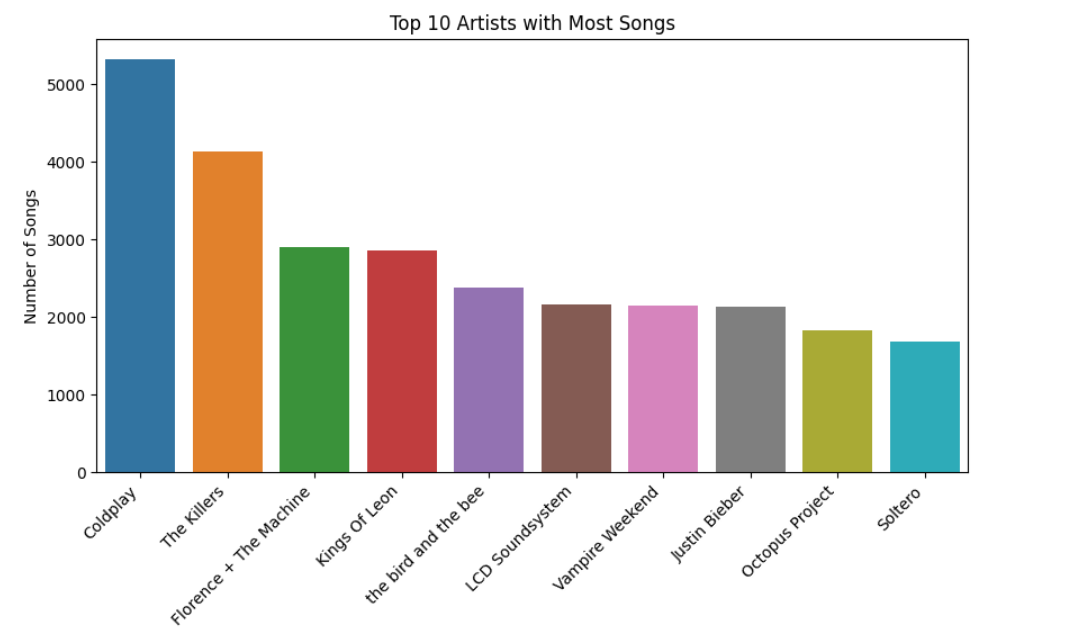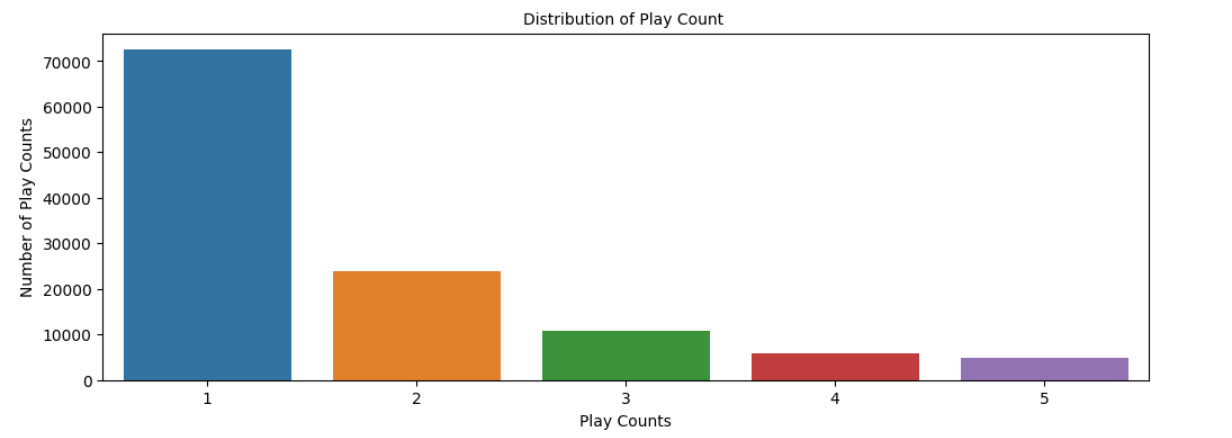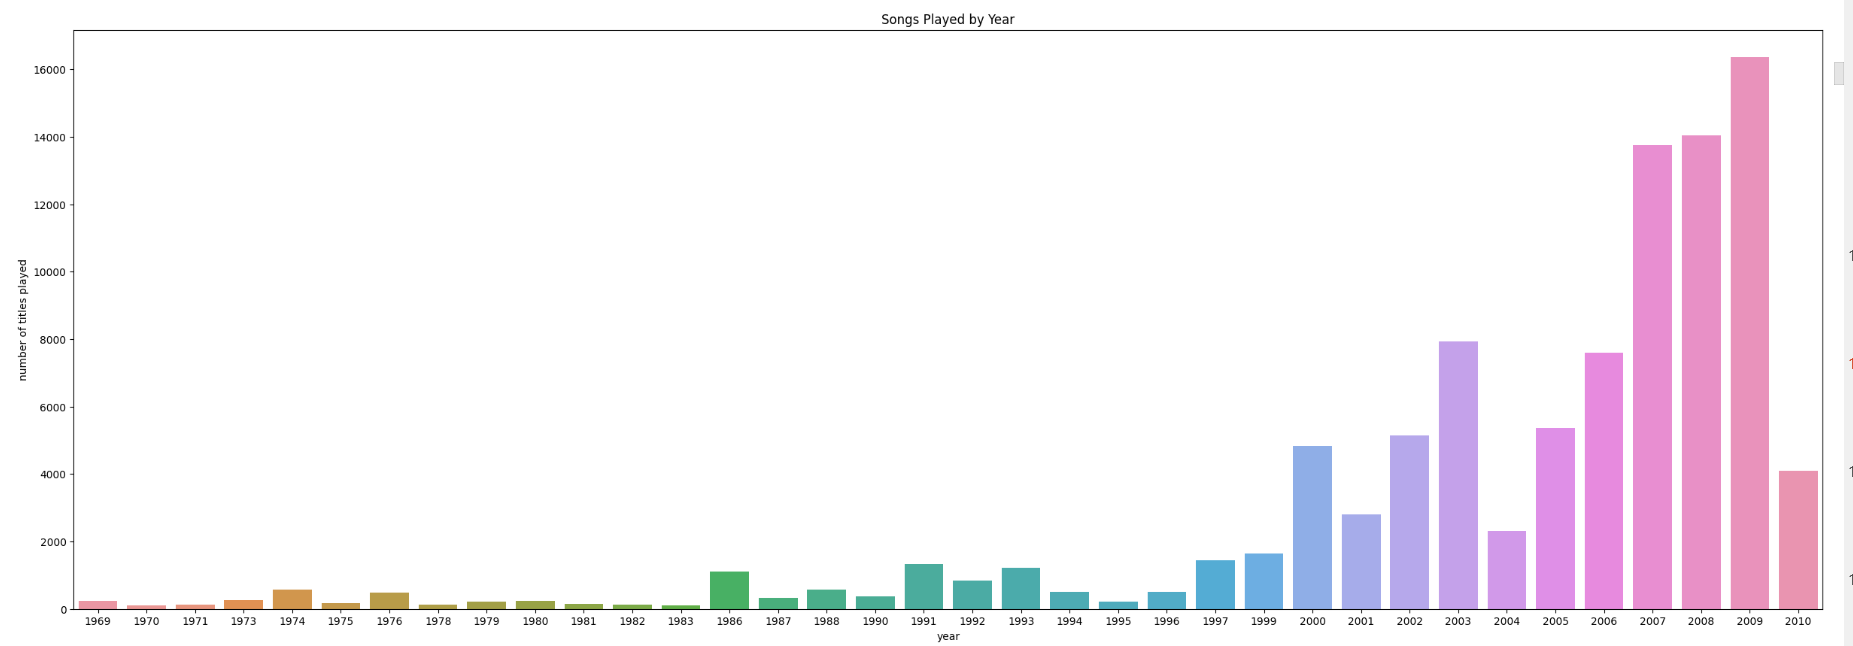